# Learning from the tragedy of Unsinkable - The RMS Titanic.

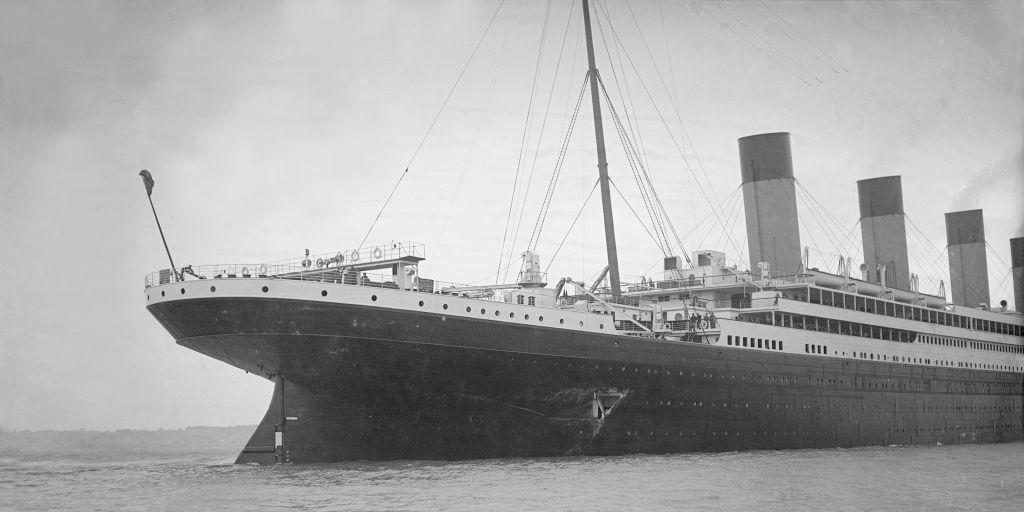

- We all seen the movie Titanic,starring Leonardo and Kate Winslet.The movie which made the titanic really unsinkable from the peoples heart.
- When kaggle gave us such an opportunity to explore the data of the RMS, i becmae curious and decided to take a look at the dataset and what i can do.
- please send your feedbacks about this notebook.
- if you want to knew more about titanic, visit these two pages:
  - http://www.titanicandco.com/
  - https://www.history.com/topics/early-20th-century-us/titanic 

- <b>Topics covered:</b> <br>
 Section 1 - Exploratory Data Analysis (EDA)
        1.2 Summary of the analysis 
        1.3 Story of the data in plain text 
        1.4 Lets findout the correlations 
        1.5 Feature engineering 
        1.6 Exploring missing values & KNN imputation 
        1.7 Lets deal with the categorical variable 
        1.8 Lets deal with the Class Imbalance 
 Section 2 - Supervised Learning: Classification 
        2.1.1 Logistic Regression 
        2.2 Building Gaussian Naive Bayes 
        2.3 Support Vector Machine: 'linear kernal' 'rbf' 'sigmoid' 
        2.4 Stochastic Gradient Descent (SGD): 
        2.5 Perceptron 
        2.6 K-Nearest Neighbor: 
        2.7 Decision Tree: 
        2.8 Random Forest: 
        2.9 K-Fold Cross Validation: 
        3.0 Lets see, the Feature importacnce 
        3.2 Hyperparameter Tuning 
        3.2.1 Training Random Forest once again 
        3.2.2 Model Evaluation 
              Submission to kaggle! 

        

# Section 1 - Exploratory Data Analysis (EDA) 

In [137]:
import statistics
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from pandas_profiling import ProfileReport
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm 
import category_encoders as ce
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import train_test_split
#For Class Imbalance
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

In [ ]:
#Lets understand features of the dataset

#pclass: A proxy for socio-economic status (SES)
#1st = Upper
#2nd = Middle
#3rd = Lower

#sibsp: The dataset defines family relations in this way...
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)

#parch: The dataset defines family relations in this way...
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.
#cabin - Cabin
#Embarked:go on board a ship, Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# 1.1 Data Exploration

In [138]:
data = pd.read_csv("train.csv")

In [82]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [83]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
data.shape

(891, 12)

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
#Lets Try with AutoEDA by pandas profile 
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()


In [19]:
#Save output result in HTML
profile.to_file("titanicAutoEDA.html")

In [24]:
#lets visualize by using autoviz library
#As name suggests it is used for auto visualization just like pandas profile or like sweetviz libraries.
auto_viz = AutoViz_Class()

Shape of your Data Set: (891, 12)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Time to run AutoViz (in seconds) = 3.874


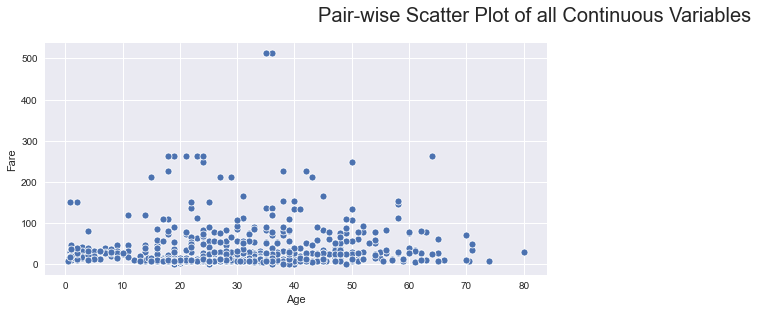

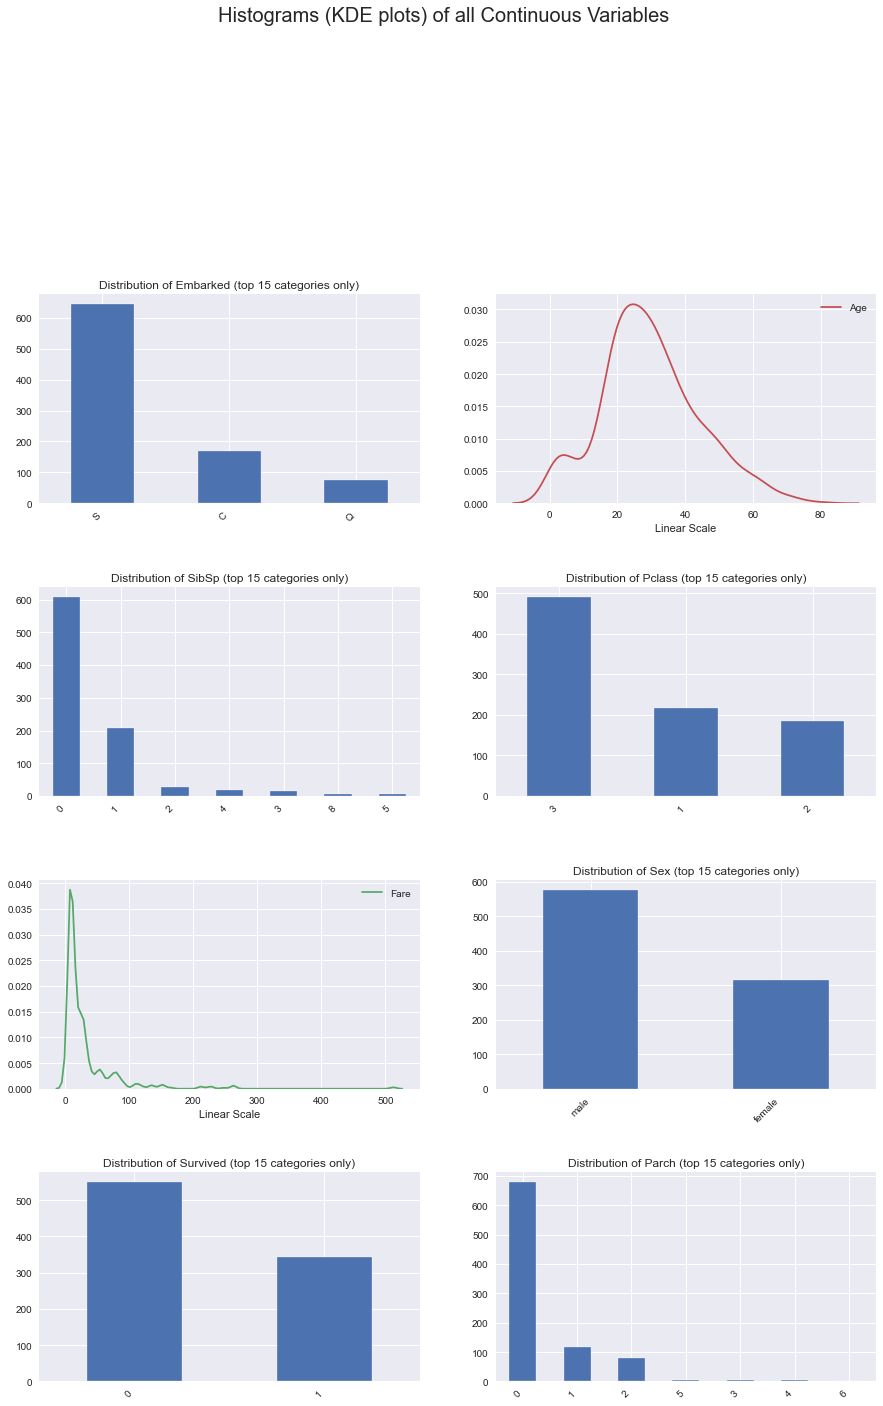

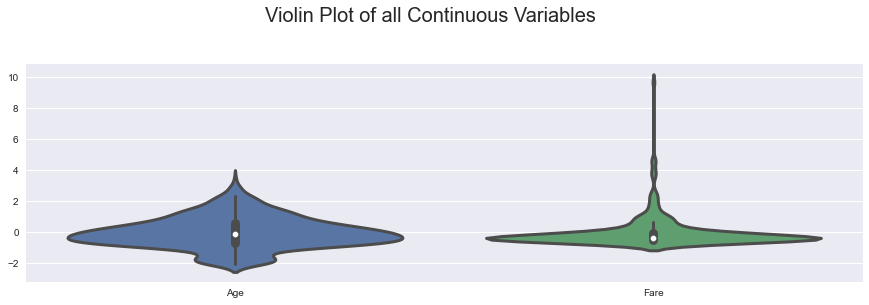

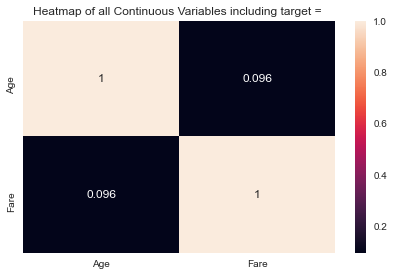

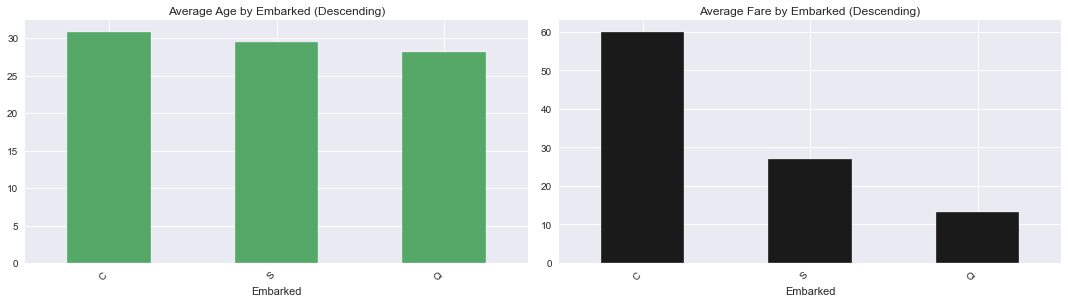

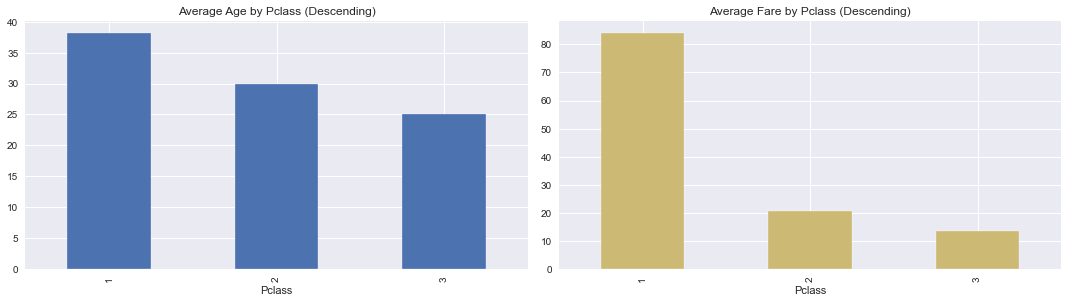

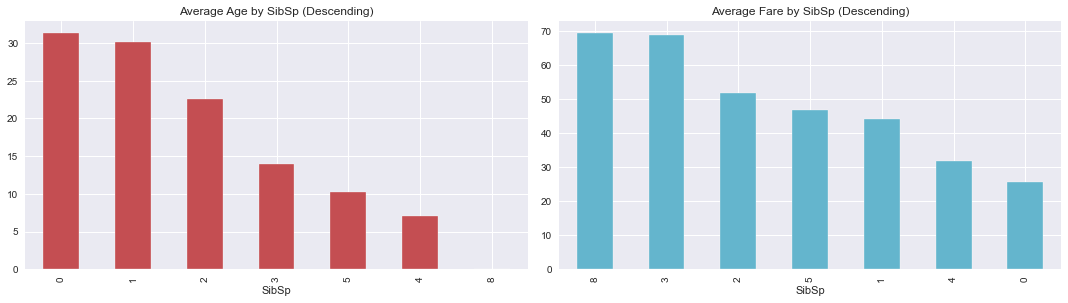

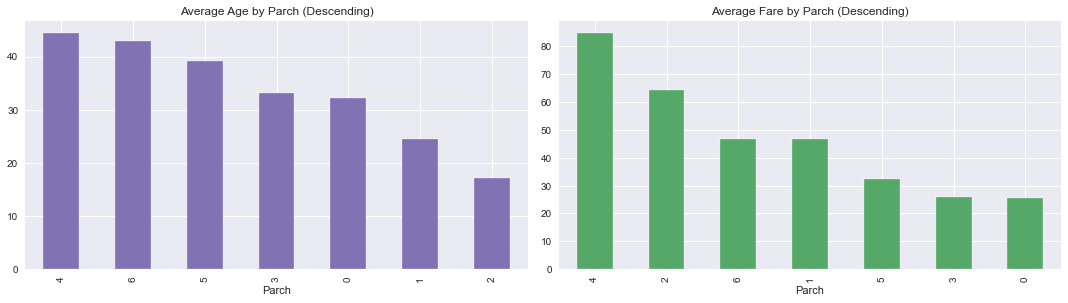

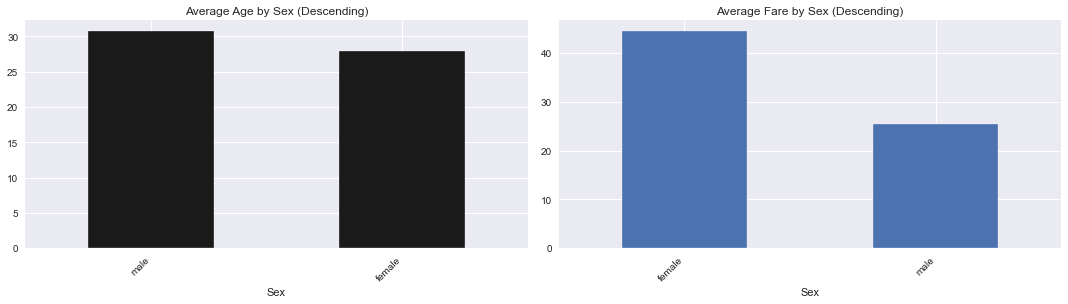

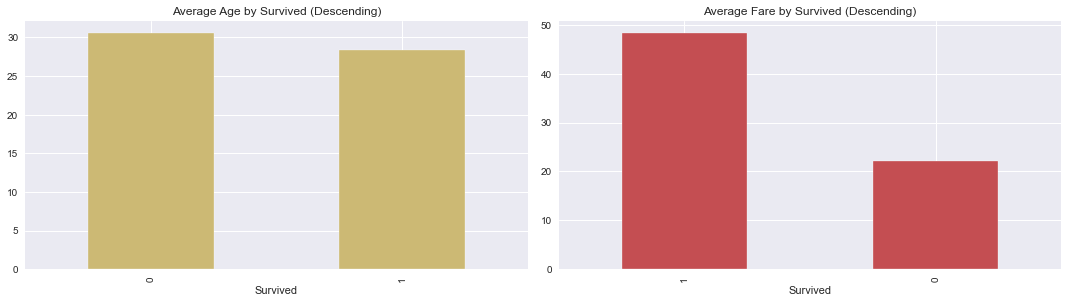

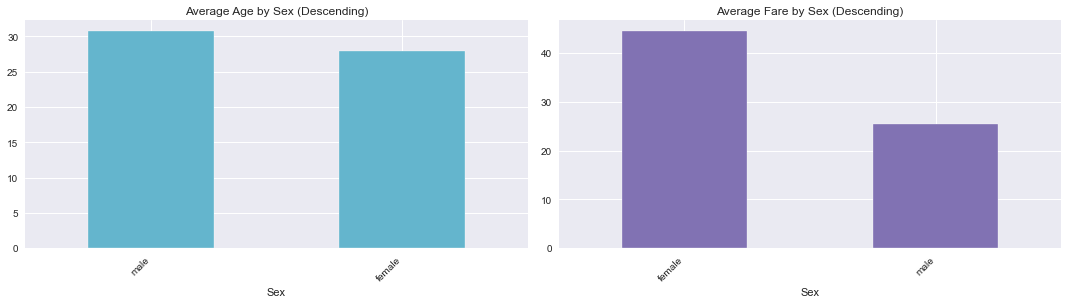

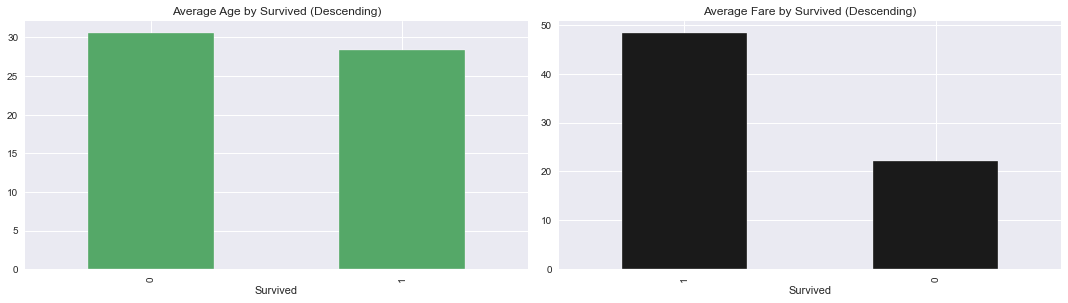

In [27]:
auto_viz_report = auto_viz.AutoViz("train.csv")

# Lets Understand the data by doing  EDA in depth

lets find some key points or connections

In [60]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [94]:
data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [95]:
data['Survived'].value_counts() 
# 0 - Not Survived
# 1 - Survived

0    549
1    342
Name: Survived, dtype: int64

In [21]:
size = (10,5)

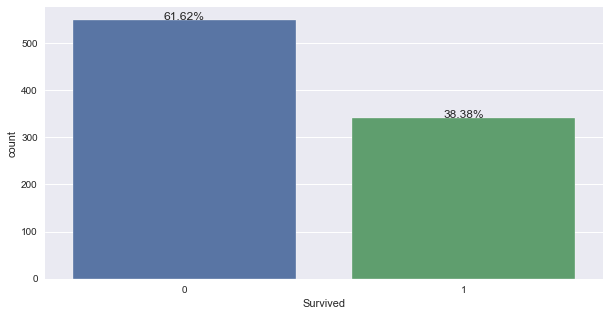

In [97]:
#Survived rate in Percentanges
plt.figure(figsize=size)
ax = sns.countplot(data['Survived'])
total = len(data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}%'.format(height/total*100),
            ha="center") 
plt.show()

In [98]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

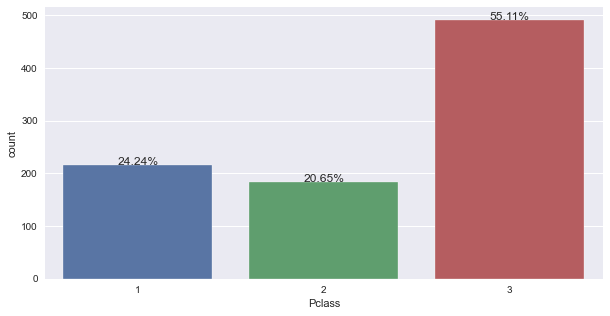

In [99]:
plt.figure(figsize=size)
ax = sns.countplot(data['Pclass'])
total = len(data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}%'.format(height/total*100),
            ha="center") 
plt.show()

In [156]:
a = data.Cabin.unique()
len(a)

148

In [100]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

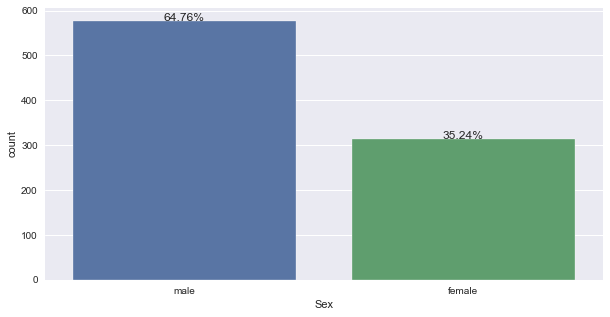

In [101]:
plt.figure(figsize=size)
ax = sns.countplot(data['Sex'])
total = len(data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}%'.format(height/total*100),
            ha="center") 
plt.show()

In [102]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

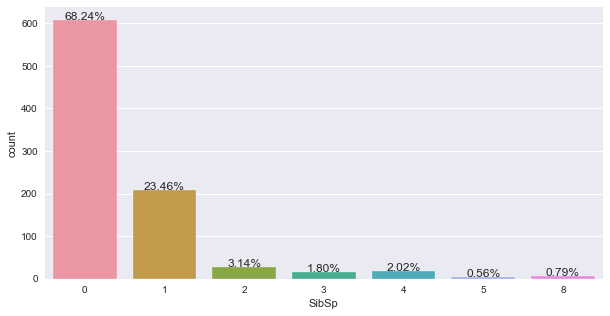

In [103]:
plt.figure(figsize=size)
ax = sns.countplot(data['SibSp'])
total = len(data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}%'.format(height/total*100),
            ha="center") 
plt.show()

In [104]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

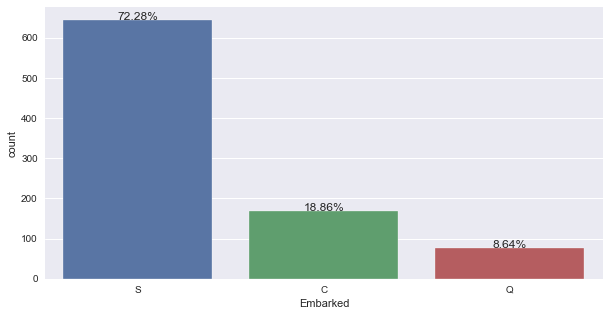

In [105]:
plt.figure(figsize=size)
ax = sns.countplot(data['Embarked'])
total = len(data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}%'.format(height/total*100),
            ha="center") 
plt.show()

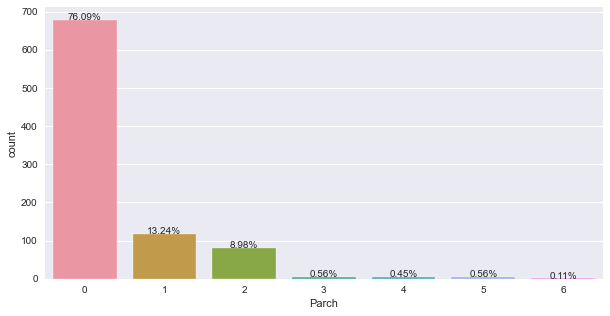

In [114]:
plt.figure(figsize=size)
ax = sns.countplot(data['Parch'])
total = len(data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}%'.format(height/total*100),
            ha="center") 
plt.show()

###### Exploring 'male and female survival' and 'not survival' rate

In [33]:
male_notSurvived= data[(data["Survived"]==int(0)) & (data["Sex"]=="male")]
male_Survived = data[(data["Survived"]==int(1)) & (data["Sex"]=="male")]
female_notSurvived = data[(data["Survived"]==int(0)) & (data["Sex"]=="female")]
female_Survived = data[(data["Survived"]==int(1)) & (data["Sex"]=="female")]

In [55]:
print("number of male passengers Not Survived is :",male_notSurvived.shape[0])
print("number of male passengers Survived is :",male_Survived.shape[0])
print("number of female passengers Not Survived is :",female_notSurvived.shape[0])
print("number of female passengers Survived is :",female_Survived.shape[0])
print()
print("% of male passengers Not Survived is:",round((468/577)*100,2))
print("% of male passengers Survived is:",round((109/577)*100,2))
print("% of female passengers Not Survived is:",round((81/314)*100,2))
print("% of female passengers Survived is:",round((233/314)*100,2))

number of male passengers Not Survived is : 468
number of male passengers Survived is : 109
number of female passengers Not Survived is : 81
number of female passengers Survived is : 233

% of male passengers Not Survived is: 81.11
% of male passengers Survived is: 18.89
% of female passengers Not Survived is: 25.8
% of female passengers Survived is: 74.2


###### Exploring 'male and female survival' and 'not survival rate' in the diffrent 'Pclass'

Class 1.

In [70]:
male_notSurvived_in_Class1 = data[(data["Survived"]==int(0)) & (data["Sex"]=="male") & (data["Pclass"]==int(1))]
male_Survived_in_Class1 = data[(data["Survived"]==int(1)) & (data["Sex"]=="male") & (data["Pclass"]==int(1))]
female_notSurvived_in_Class1 = data[(data["Survived"]==int(0)) & (data["Sex"]=="female") & (data["Pclass"]==int(1))]
female_Survived_in_Class1 = data[(data["Survived"]==int(1)) & (data["Sex"]=="female") & (data["Pclass"]==int(1))]

In [80]:
print("number of male passengers Not Survived in Class_1 is :",male_notSurvived_in_Class1.shape[0])
print("number of male passengers Survived in Class_1 is :",male_Survived_in_Class1.shape[0])
print("number of female passengers Not Survived in Class_1 is :",female_notSurvived_in_Class1.shape[0])
print("number of female passengers Survived in Class_1 is :",female_Survived_in_Class1.shape[0])
print()
print("% of male passengers Not Survived in Class_1 is:",round((77/122)*100,2)) 
print("% of male passengers Survived in Class_1 is:",round((45/122)*100,2))
print("% of female passengers Not Survived in Class_1 is:",round((3/94)*100,2))
print("% of female passengers Survived in Class_1 is:",round((91/94)*100,2))

number of male passengers Not Survived in Class_1 is : 77
number of male passengers Survived in Class_1 is : 45
number of female passengers Not Survived in Class_1 is : 3
number of female passengers Survived in Class_1 is : 91

% of male passengers Not Survived in Class_1 is: 63.11
% of male passengers Survived in Class_1 is: 36.89
% of female passengers Not Survived in Class_1 is: 3.19
% of female passengers Survived in Class_1 is: 96.81


Class 2.

In [82]:
male_notSurvived_in_Class2 = data[(data["Survived"]==int(0)) & (data["Sex"]=="male") & (data["Pclass"]==int(2))]
male_Survived_in_Class2 = data[(data["Survived"]==int(1)) & (data["Sex"]=="male") & (data["Pclass"]==int(2))]
female_notSurvived_in_Class2 = data[(data["Survived"]==int(0)) & (data["Sex"]=="female") & (data["Pclass"]==int(2))]
female_Survived_in_Class2 = data[(data["Survived"]==int(1)) & (data["Sex"]=="female") & (data["Pclass"]==int(2))]

In [85]:
print("number of male passengers Not Survived in Class_2 is :",male_notSurvived_in_Class2.shape[0])
print("number of male passengers Survived in Class_2 is :",male_Survived_in_Class2.shape[0])
print("number of female passengers Not Survived in Class_2 is :",female_notSurvived_in_Class2.shape[0])
print("number of female passengers Survived in Class_2 is :",female_Survived_in_Class2.shape[0])
print()
print("% of male passengers Not Survived in Class_2 is:",round((91/108)*100,2)) 
print("% of male passengers Survived in Class_2 is:",round((17/108)*100,2))
print("% of female passengers Not Survived in Class_2 is:",round((6/76)*100,2))
print("% of female passengers Survived in Class_2 is:",round((70/76)*100,2))

number of male passengers Not Survived in Class_2 is : 91
number of male passengers Survived in Class_2 is : 17
number of female passengers Not Survived in Class_2 is : 6
number of female passengers Survived in Class_2 is : 70

% of male passengers Not Survived in Class_2 is: 84.26
% of male passengers Survived in Class_2 is: 15.74
% of female passengers Not Survived in Class_2 is: 7.89
% of female passengers Survived in Class_2 is: 92.11


Class 3.

In [87]:
male_notSurvived_in_Class3 = data[(data["Survived"]==int(0)) & (data["Sex"]=="male") & (data["Pclass"]==int(3))]
male_Survived_in_Class3 = data[(data["Survived"]==int(1)) & (data["Sex"]=="male") & (data["Pclass"]==int(3))]
female_notSurvived_in_Class3 = data[(data["Survived"]==int(0)) & (data["Sex"]=="female") & (data["Pclass"]==int(3))]
female_Survived_in_Class3 = data[(data["Survived"]==int(1)) & (data["Sex"]=="female") & (data["Pclass"]==int(3))]

In [89]:
print("number of male passengers Not Survived in Class_3 is :",male_notSurvived_in_Class3.shape[0])
print("number of male passengers Survived in Class_3 is :",male_Survived_in_Class3.shape[0])
print("number of female passengers Not Survived in Class_3 is :",female_notSurvived_in_Class3.shape[0])
print("number of female passengers Survived in Class_3 is :",female_Survived_in_Class3.shape[0])
print()
print("% of male passengers Not Survived in Class_3 is:",round((300/347)*100,2)) 
print("% of male passengers Survived in Class_3 is:",round((47/347)*100,2))
print("% of female passengers Not Survived in Class_3 is:",round((72/144)*100,2))
print("% of female passengers Survived in Class_3 is:",round((72/144)*100,2))

number of male passengers Not Survived in Class_3 is : 300
number of male passengers Survived in Class_3 is : 47
number of female passengers Not Survived in Class_3 is : 72
number of female passengers Survived in Class_3 is : 72

% of male passengers Not Survived in Class_3 is: 86.46
% of male passengers Survived in Class_3 is: 13.54
% of female passengers Not Survived in Class_3 is: 50.0
% of female passengers Survived in Class_3 is: 50.0


###### Exploring 'Age' of survival of the 'Male' and 'Female' passengers

In [4]:
df_survivors = data[data['Survived'] == 1]
df_nonsurvivors = data[data['Survived'] == 0]

In [16]:
# Filling in the data inside the Violin Objects
import plotly.graph_objs as go
violin_survivors = go.Violin(
    y=df_survivors['Age'],
    x=df_survivors['Survived'],
    name='Survivors',
    marker_color='forestgreen',
    box_visible=True)

violin_nonsurvivors = go.Violin(
    y=df_nonsurvivors['Age'],
    x=df_nonsurvivors['Survived'],
    name='Non-Survivors',
    marker_color='darkred',
    box_visible=True)

data1 = [violin_nonsurvivors, violin_survivors]


# Plot's Layout (background color, title, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Age" of survivors vs Ages of non-survivors',
  xaxis=dict(
        title='Survived or not'
    ),
    yaxis=dict(
        title='Age'
    )
)

fig = go.Figure(data=data1, layout=layout)
fig.show()

In [12]:
notSurvived_data = data[(data["Survived"]==int(0))]
Survived_data = data[(data["Survived"]==int(1))]

In [12]:
column0 = notSurvived_data['Age']
max_value0 = column0.max()
print("maximum age of the passengers not survived is :",max_value0)

column_min0 = notSurvived_data['Age']
min_value0 = column_min0.min()
print("minimun age of the passengers not survived is :",min_value0)


column1 = Survived_data['Age']
max_value1 = column1.max()
print("max age of the passengers survived is :",max_value1)

column_min1 = Survived_data['Age']
min_value1 = column_min1.min()
print("minimum age of the passengers survived is :",min_value1)

maximum age of the passengers not survived is : 74.0
minimun age of the passengers not survived is : 1.0
max age of the passengers survived is : 80.0
minimum age of the passengers survived is : 0.42


In [14]:
#Age based on the Pclass passengers
age_by_pclass_sex = data.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(data['Age'].median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


###### Exploring 'Survival' and 'Non-Survival' rate based on 'Fare'

In [18]:
violin_survivors = go.Violin(
    y=df_survivors['Fare'],
    x=df_survivors['Survived'],
    name='Survivors',
    marker_color='forestgreen',
    box_visible=True)

violin_nonsurvivors = go.Violin(
    y=df_nonsurvivors['Fare'],
    x=df_nonsurvivors['Survived'],
    name='Non-Survivors',
    marker_color='darkred',
    box_visible=True)

data2 = [violin_nonsurvivors, violin_survivors]


# Plot's Layout (background color, title, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Fare" of survivors vs Fare of non-survivors',
  xaxis=dict(
        title='Survived or not'
    ),
    yaxis=dict(
        title='Fare'
    )
)

fig = go.Figure(data=data2, layout=layout)
fig.show()

In [38]:
class_one = data[(data["Pclass"]==int(1))]
class_one_fare = class_one['Fare']
print("max fare of the class one",class_one_fare.max())
print("min fare of the class one",class_one_fare.min())
print("Avg fare of the class one",class_one_fare.mean())

max fare of the class one 512.3292
min fare of the class one 0.0
Avg fare of the class one 84.15468749999992


In [39]:
class_two = data[(data["Pclass"]==int(2))]
class_two_fare = class_two['Fare']
print("max fare of the class one",class_two_fare.max())
print("min fare of the class one",class_two_fare.min())
print("Avg fare of the class one",class_two_fare.mean())

max fare of the class one 73.5
min fare of the class one 0.0
Avg fare of the class one 20.66218315217391


In [40]:
class_three = data[(data["Pclass"]==int(3))]
class_three_fare = class_three['Fare']
print("max fare of the class one",class_three_fare.max())
print("min fare of the class one",class_three_fare.min())
print("Avg fare of the class one",class_three_fare.mean())

max fare of the class one 69.55
min fare of the class one 0.0
Avg fare of the class one 13.675550101832997


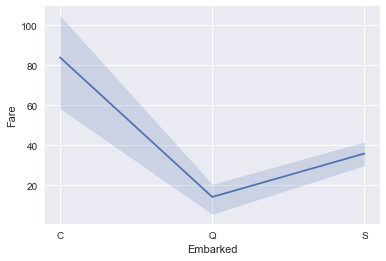

In [23]:
#Checking fares based on Embarked places.
sns.lineplot(x ='Embarked', y ='Fare', data = data,  
            palette ='plasma', estimator = np.std) 

###### Exploring 'Survival' and 'Non-Survival based on 'Parch'

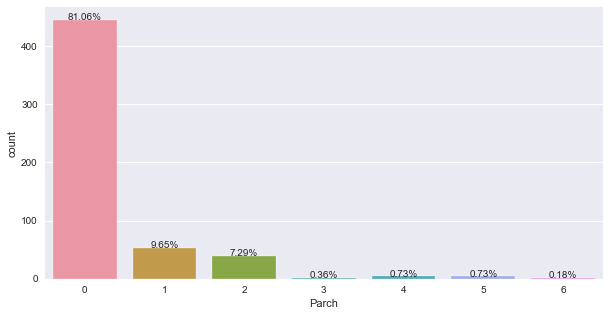

In [22]:
#Not survived passengers % based on Parch
plt.figure(figsize=size)
ax = sns.countplot(notSurvived_data['Parch'])
total = len(notSurvived_data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}%'.format(height/total*100),
            ha="center") 
plt.show()

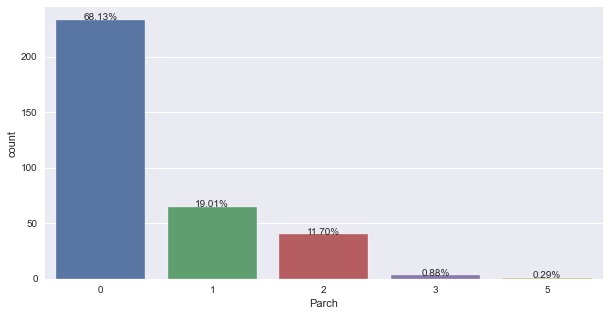

In [23]:
#Survived passengers % based on Parch
plt.figure(figsize=size)
ax = sns.countplot(Survived_data['Parch'])
total = len(Survived_data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}%'.format(height/total*100),
            ha="center") 
plt.show()

###### Exploring 'Survival' and 'Non-Survival based on 'SibSp'

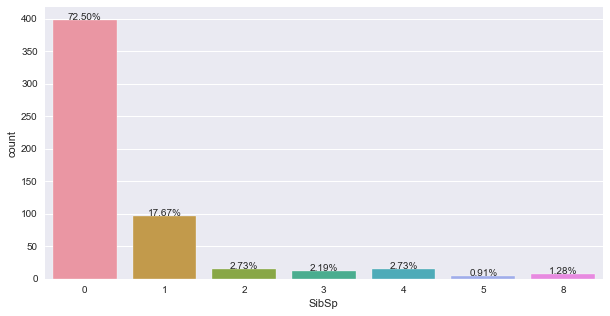

In [25]:
#Not survived passengers, % based on SibSp
plt.figure(figsize=size)
ax = sns.countplot(notSurvived_data['SibSp'])
total = len(notSurvived_data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}%'.format(height/total*100),
            ha="center") 
plt.show()

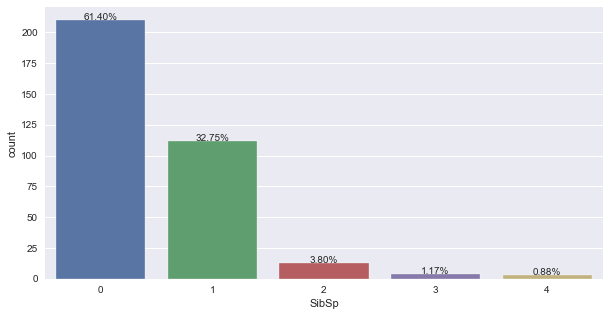

In [26]:
#Survived passengers, % based on SibSp
plt.figure(figsize=size)
ax = sns.countplot(Survived_data['SibSp'])
total = len(Survived_data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}%'.format(height/total*100),
            ha="center") 
plt.show()

###### Exploring 'Survival' and 'Non-Survival based on 'Embarked'

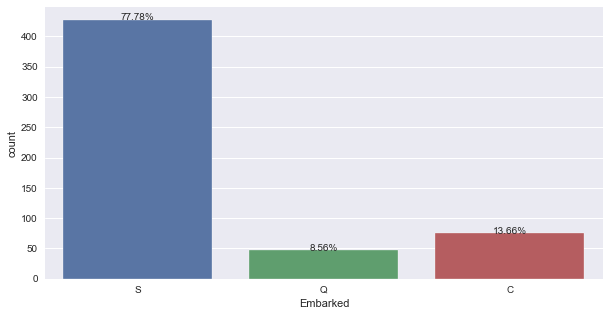

In [27]:
#Not survived passengers, % based on Embarked
plt.figure(figsize=size)
ax = sns.countplot(notSurvived_data['Embarked'])
total = len(notSurvived_data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}%'.format(height/total*100),
            ha="center") 
plt.show()

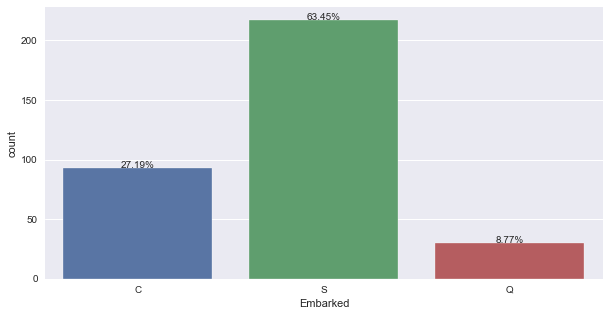

In [28]:
#Not survived passengers, % based on Embarked
plt.figure(figsize=size)
ax = sns.countplot(Survived_data['Embarked'])
total = len(Survived_data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}%'.format(height/total*100),
            ha="center") 
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

# 1.2 Summary of the analysis

With the help of EDA i can able to see the individual features and there class's.
now i will summarize all the data that i observed till this step. 
 
- Age
    - Average Age of the passengers embarked the ship is 30 years and standard deviation of 15 years.
    - 25% of the people will falls below 20 years, 75% of the people will fall below the 38 years of age.
- Fare
    - Average Fare of the passengers tickets is 32k pounds and standard deviation of 50k pounds.
    - 25% of the ticket price data is falls below 8k pounds, and 75% data falls below the 31k pounds.
- Survived
    -  Data contains the reocrds of 62.6% of passegers who are not surivived, and 38.3% of the people successfully managed to survive
- Pclass
    - Data contains 24.24% of 1st Pclass or Upper class ,20.65% of 2nd Pclass or Middle class, and 55.11% of 3rd Pclass or Lower class on the basis of socio-economic-status (SES)
- Sex
    - the data holds a records of 64.76% of male and 35.24% of female passengers embarked the ship
- SibSp
    - Records has 68.24% of the people having No siblings or spouses, 24.46% of the people has 1 siblings or spouses ,
      3.14% of the people has 2 siblings i dont think people have more than 2 spouses so.. its not a good way of considering         spouses from here after,2.02% of the people has 4 siblings, 0.56% and 0.79% has siblings 5 and 8 respectively. 
- Embarked
     - 77.28% of the people embarked from the S = Southampton and 18.66% of the people embarked from the C = Cherbourg and 8.64% of the people embarked from the Q = Queenstown
- Parch
     - As we know that Parch indicates parents child relationship, 76.09% passengers/people has 0 Parch(Parents/child/stepson), 13.24% of people has 1 Parch,8.98% of the people 2 parch, 0.56% of the people has 3 Parch, 0.45% of the people has 4 Parch,0.56% of the people has 5 Parch, and 0.11% of the people has 6 Parch
- Cabin
    - Total number of  unique cabin this data has is 148
 
###### Survival and Non-Survival rate of the 'Sex'
-  64.76% of the Male who embarked the ship(we have seen it earlier) in which 81.11% of the male's failed to Survive, only 18.89% of the male's somehow managed to Survive
- 35.24% of the Female passengers embarked the ship in which 25.8% failed survive, However 74.2% of the Females managed to survive, Thats really amazing !! More power to Females.

###### Survival and Non-Survival rate of the 'Sex' Based on 'Pclass' {Socio-Economic-Status}
- class.1(Upper)
    - 63.11% of Male passengers failed to survive and 36.89% of the Male passemgers survived successfully
    - 3.19% of Female passengers failed to survive but 96.81% of the Female passengers are survived successfully
- class.2(Middle)
    - 84.26% of Male passengers failed to survive but 15.74% of the Male passengers survived successfully
    - 7.89% of the Female passengers failed to survive but 92.11% of the Female passengers survived successfully
- class.3(Lower)
    - 86.46% of the male passengers failed to survive but 13.54% of the male passengers survived
    - 50% is the percentage of the both Female survived and failed to survive
    
###### Survival and Non-Survival rate based on 'Age'
- Median value of the Age of the passengers who Not-Survived is 29years. q1=21 q3=39 IQR=18years
- Median value of the Age of the passengers who Survived is 28years. q1=19 q3=36 IQR=17years
- maximum age of the passengers not survived is: 74years  and minimum age of the passengers not survived is 1year
- maximum age of the passengers survived is: 80years  and minimum age of the passengers survived is 0.42(or 4months baby)

###### Exploring 'Survival' and 'Non-Survival' rate based on 'Fare'
- median value of the fare of the  people not survived is 10.5k in pounds, q1=7.85 q3=26 IQR=18.5k in pounds
- median value of the fare of the people survived is 26k in pounds, q1=12.47 q3=57  IQR=44.53kk in pounds
- Mean of the Pclass_1 fare is 84k in pounds and Mean of the Pclass_2 fare is 20k and Mean of the 3rd Pclass fare is 13k
- One more extra point : As fares are also dependent on the place of embarking, Fare of the embaring is decreases as we move from left to right from C to Q and increases from Q to S but not increase as much as C, it also shows us indirectly that C is a distant place compared to S compared to Q.

###### Exploring 'Survival' and 'Non-Survival' rate based on 'Parch'
- % of the people Not survived based on the Parch is, people with 0parch:81.06% ,1:9.65% ,2:7.29% ,3:0.36% ,4:0.73%
- % of the people Survived based on the Parch is, people with 0parch:68.13% , 1:19.01%, 2:11.70% , 3:0.88%

###### Exploring 'Survival' and 'Non-Survival' rate based on 'SibSp'
- % of the people Not survived based on the SibSp is,people with 0SibSp:72.50%,1:17.67%,2:2.73%,3:2.19%,4:2.73%,5:0.91%,8:1.28%
- % of the people Survived based on the SibSp is, people with 0SibSp:61.40% , 1:32.75%, 2:3.80% , 3:1.17% , 4:0.88%

###### Exploring 'Survival' and 'Non-Survival' rate based on 'Embarked'
- we knew % of the people embarked in last section, out of them lets see survival and nonsurvival details
    - passengers embarked from the S they failed to survive more(77.78%),next is from C(13.66%) followed by Q(%8.56%)
    - passenger embarked from the S they survived more. next is from C followed by Q.

# 1.3 Story of the data in plain text

With the help of the Summary lets try to understand what story data is telling us..

- Females survival rate is more compared to the survival rate of the Males
- In Pclasses, Class1(Upper class) has higher survival rate regardless of men and women followed by 2nd and 3rd class,Its may because of the large or space allowed for the higher classes,[Here](https://www.ultimatetitanic.com/interior-fittings#:~:text=There%20were%20over%201000%20third,two%2Dberth%20cabins%20on%20board.) is the complete real details of the ship or there may be a chance of special service offered to the Class1 passengers
    - in all the 3 classes Female survival rate is higher compared to the males
    - there is a 76.19% of average fare decreases from class_1 to class_2, and 35% average fare decreases from class_2 to class_3, So Survival rate is indirectly dependent on fare,because the Pclass is directly related to fare
- As per the data, Survival and Non survival rate has not affected much by the Age
- The passengers who had Parch(parent child relation) more than 1 survived more compared to those who dont have 
- In general, passenger who has siblings are survived compared to those who dont have
- Survival rate indirectly depended on the Fare, Higher the fare(or higher the Pclass) greater the chances of survival

# 1.4 Lets findout the correlations

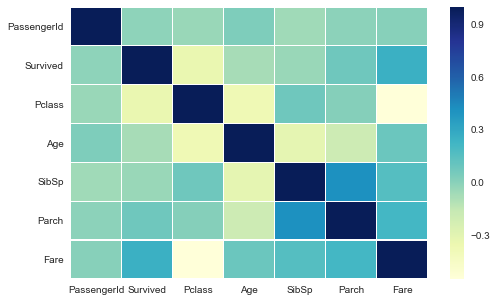

In [47]:
corrmat = data.corr() 
  
f, ax = plt.subplots(figsize =(8, 5)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

- looks like there is positive correlation between Survived and Fare
- SibSp has positive correlation with Parch & vice versa
- Fare has positive correlation with the Survived and Parch

###### lets take a look at PPS to find out any non linear relations

You may have heard about correlation matrices. Basically, correlation matrices are able to identify linear relationships between variables. Because relationships in our data may sometimes be non-linear (most of the times, actually), we can use a PPS (Predictive Power Score) matrix, to figure out non-linear relations between columns.

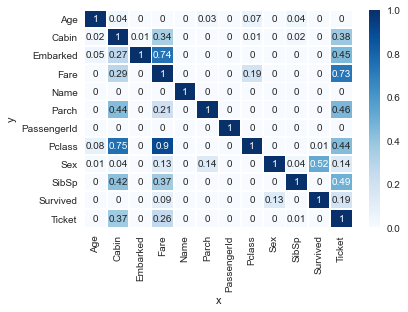

In [17]:
import ppscore as pps
matrix_df = pps.matrix(data)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
matrix_df = matrix_df.apply(lambda x: round(x, 2)) # Rounding matrix_df's values to 0,XX
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.75, annot=True)

See here we can clearly see a greater correlation between the Embarked and the Fare attribute something which i failed to observe in previous plot. That is the advantage of PPS to get a correlation between numerical and categorical feature

In [271]:
#sns.pairplot(data)

# 1.5 Feature engineering

In [139]:
df =  data

In [140]:
#Making categorical variables for the 'age'
df['AgeCategory'] = ''
df['AgeCategory'].loc[(df['Age'] < 18)] = 'young'
df['AgeCategory'].loc[(df['Age'] >= 18) & (df['Age'] < 56)] = 'mature'
df['AgeCategory'].loc[(df['Age'] >= 56)] = 'senior'
#Making categorical variable for the 'Sibsp'
df['FamilySize'] = ''
df['FamilySize'].loc[(df['SibSp'] <= 2)] = 'small'
df['FamilySize'].loc[(df['SibSp'] > 2) & (df['SibSp'] <= 5 )] = 'medium'
df['FamilySize'].loc[(df['SibSp'] > 5)] = 'large'
#making categorical and finding out the passenger is alone or not
df['IsAlone'] = ''
df['IsAlone'].loc[((df['SibSp'] + df['Parch']) > 0)] = 'No'
df['IsAlone'].loc[((df['SibSp'] + df['Parch']) == 0)] = 'Yes'
#Breaking sex category in to youngmale young female etc
df['SexCat'] = ''
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] <= 21)] = 'youngmale'
df['SexCat'].loc[(df['Sex'] == 'male') & ((df['Age'] > 21) & (df['Age']) < 50)] = 'maturemale'
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] > 50)] = 'seniormale'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] <= 21)] = 'youngfemale'
df['SexCat'].loc[(df['Sex'] == 'female') & ((df['Age'] > 21) & (df['Age']) < 50)] = 'maturefemale'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] > 50)] = 'seniorfemale'

In [141]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1
df['Title'] = df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df['Title'] = df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

In [142]:
#Counting Unique tickets
df['Ticket_Frequency'] = df.groupby('Ticket')['Ticket'].transform('count')

In [143]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory,FamilySize,IsAlone,SexCat,Title,Is_Married,Ticket_Frequency
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mature,small,No,maturemale,Mr,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mature,small,No,maturefemale,Miss/Mrs/Ms,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,mature,small,Yes,maturefemale,Miss/Mrs/Ms,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mature,small,No,maturefemale,Miss/Mrs/Ms,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mature,small,Yes,maturemale,Mr,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,,small,Yes,maturemale,Mr,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,mature,small,Yes,seniormale,Mr,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,young,medium,No,maturemale,Master,0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,mature,small,No,maturefemale,Miss/Mrs/Ms,1,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,young,small,No,maturefemale,Miss/Mrs/Ms,1,2


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeCategory',
       'FamilySize', 'IsAlone', 'SexCat', 'Title', 'Is_Married',
       'Ticket_Frequency'],
      dtype='object')

In [144]:
# Importing data and displaying some rows
df_test = pd.read_csv("test.csv")


# Creating a categorical variable for Ages
df_test['AgeCategory'] = ''
df_test['AgeCategory'].loc[(df_test['Age'] < 18)] = 'young'
df_test['AgeCategory'].loc[(df_test['Age'] >= 18) & (df_test['Age'] < 56)] = 'mature'
df_test['AgeCategory'].loc[(df_test['Age'] >= 56)] = 'senior'


# Creating a categorical variable for Family Sizes
df_test['FamilySize'] = ''
df_test['FamilySize'].loc[(df_test['SibSp'] <= 2)] = 'small'
df_test['FamilySize'].loc[(df_test['SibSp'] > 2) & (df_test['SibSp'] <= 5 )] = 'medium'
df_test['FamilySize'].loc[(df_test['SibSp'] > 5)] = 'large'


# Creating a categorical variable to tell if the passenger is alone
df_test['IsAlone'] = ''
df_test['IsAlone'].loc[((df_test['SibSp'] + df_test['Parch']) > 0)] = 'no'
df_test['IsAlone'].loc[((df_test['SibSp'] + df_test['Parch']) == 0)] = 'yes'


# Creating a categorical variable to tell if the passenger is a Young/Mature/Senior male or a Young/Mature/Senior female
df_test['SexCat'] = ''
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & (df_test['Age'] <= 21)] = 'youngmale'
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & ((df_test['Age'] > 21) & (df_test['Age']) < 50)] = 'maturemale'
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & (df_test['Age'] > 50)] = 'seniormale'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & (df_test['Age'] <= 21)] = 'youngfemale'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & ((df_test['Age'] > 21) & (df_test['Age']) < 50)] = 'maturefemale'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & (df_test['Age'] > 50)] = 'seniorfemale'


# Creating a categorical variable for the passenger's title
# Title is created by extracting the prefix before "Name" feature
# This title needs to be a feature because all female titles are grouped with each other
# Also, creating a column to tell if the passenger is married or not
# "Is_Married" is a binary feature based on the Mrs title. Mrs title has the highest survival rate among other female titles
df_test['Title'] = df_test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_test['Is_Married'] = 0
df_test['Is_Married'].loc[df['Title'] == 'Mrs'] = 1
df_test['Title'] = df_test['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_test['Title'] = df_test['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')


# Creating "Ticket Frequency" Feature
# There are too many unique Ticket values to analyze, so grouping them up by their frequencies makes things easier
df_test['Ticket_Frequency'] = df_test.groupby('Ticket')['Ticket'].transform('count')


# Dropping unnecessary columns
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
#df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [145]:
df_test.head() #Test data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeCategory,FamilySize,IsAlone,SexCat,Title,Is_Married,Ticket_Frequency
0,3,male,34.5,0,0,7.8292,Q,mature,small,yes,maturemale,Mr,0,1
1,3,female,47.0,1,0,7.0000,S,mature,small,no,maturefemale,Miss/Mrs/Ms,0,1
2,2,male,62.0,0,0,9.6875,Q,senior,small,yes,seniormale,Mr,0,1
3,3,male,27.0,0,0,8.6625,S,mature,small,yes,maturemale,Mr,0,1
4,3,female,22.0,1,1,12.2875,S,mature,small,no,maturefemale,Miss/Mrs/Ms,0,1


In [146]:
df.head() #Train data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory,FamilySize,IsAlone,SexCat,Title,Is_Married,Ticket_Frequency
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mature,small,No,maturemale,Mr,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mature,small,No,maturefemale,Miss/Mrs/Ms,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,mature,small,Yes,maturefemale,Miss/Mrs/Ms,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mature,small,No,maturefemale,Miss/Mrs/Ms,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mature,small,Yes,maturemale,Mr,0,1


###### Lets drop the columns that we are not using for the model building, Also lets seperate numerical columns with the categorical columns

In [147]:
def get_feature_names(df):
    #Separatimg the target
    target = df['Survived']
    #Drop unused columns
    df.drop(['PassengerId','Survived','Ticket','Name','Cabin'],axis=1,inplace=True)
    categorical_df = df.select_dtypes(include=['object'])
    numerical_df = df.select_dtypes(exclude=['object'])
    #Store
    categorical_columns = list(categorical_df.columns)
    numerical_columns = list(numerical_df.columns)
    #print
    print("categorical columns are: ",categorical_columns)
    print("numerical_columns are: ",numerical_columns)
    return target,categorical_columns,numerical_columns
target,categorical_columns,numerical_columns = get_feature_names(df)
    

categorical columns are:  ['Sex', 'Embarked', 'AgeCategory', 'FamilySize', 'IsAlone', 'SexCat', 'Title']
numerical_columns are:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Is_Married', 'Ticket_Frequency']


In [148]:
#Actually a Training data
df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeCategory,FamilySize,IsAlone,SexCat,Title,Is_Married,Ticket_Frequency
0,3,male,22.0,1,0,7.2500,S,mature,small,No,maturemale,Mr,0,1
1,1,female,38.0,1,0,71.2833,C,mature,small,No,maturefemale,Miss/Mrs/Ms,1,1
2,3,female,26.0,0,0,7.9250,S,mature,small,Yes,maturefemale,Miss/Mrs/Ms,0,1
3,1,female,35.0,1,0,53.1000,S,mature,small,No,maturefemale,Miss/Mrs/Ms,1,2
4,3,male,35.0,0,0,8.0500,S,mature,small,Yes,maturemale,Mr,0,1


In [149]:
df.shape

(891, 14)

In [93]:
#Testing data
df_test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeCategory,FamilySize,IsAlone,SexCat,Title,Is_Married,Ticket_Frequency
0,892,3,male,34.5,0,0,7.8292,Q,mature,small,yes,maturemale,Mr,0,1
1,893,3,female,47.0,1,0,7.0000,S,mature,small,no,maturefemale,Miss/Mrs/Ms,0,1
2,894,2,male,62.0,0,0,9.6875,Q,senior,small,yes,seniormale,Mr,0,1
3,895,3,male,27.0,0,0,8.6625,S,mature,small,yes,maturemale,Mr,0,1
4,896,3,female,22.0,1,1,12.2875,S,mature,small,no,maturefemale,Miss/Mrs/Ms,0,1


In [94]:
df_test.shape

(418, 15)

# 1.6 Exploring missing values

In [150]:
# sum of the missing values on train data
df.isna().sum()

Pclass                0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Fare                  0
Embarked              2
AgeCategory           0
FamilySize            0
IsAlone               0
SexCat                0
Title                 0
Is_Married            0
Ticket_Frequency      0
dtype: int64

In [151]:
# % of the missing values in train data
for x in df.columns:
    print("Total % Null value in "+x+" - ",df[x].isna().sum()/len(df)*100)
    print()

Total % Null value in Pclass -  0.0

Total % Null value in Sex -  0.0

Total % Null value in Age -  19.865319865319865

Total % Null value in SibSp -  0.0

Total % Null value in Parch -  0.0

Total % Null value in Fare -  0.0

Total % Null value in Embarked -  0.22446689113355783

Total % Null value in AgeCategory -  0.0

Total % Null value in FamilySize -  0.0

Total % Null value in IsAlone -  0.0

Total % Null value in SexCat -  0.0

Total % Null value in Title -  0.0

Total % Null value in Is_Married -  0.0

Total % Null value in Ticket_Frequency -  0.0



In [96]:
#sum of the missing values on the test data
df_test.isna().sum()

PassengerId          0
Pclass               0
Sex                  0
Age                 86
SibSp                0
Parch                0
Fare                 1
Embarked             0
AgeCategory          0
FamilySize           0
IsAlone              0
SexCat               0
Title                0
Is_Married           0
Ticket_Frequency     0
dtype: int64

In [152]:
# % of the null values in test data
for x in df_test.columns:
    print("Total % Null value in "+x+" - ",df_test[x].isna().sum()/len(df_test)*100)
    print()

Total % Null value in Pclass -  0.0

Total % Null value in Sex -  0.0

Total % Null value in Age -  20.574162679425836

Total % Null value in SibSp -  0.0

Total % Null value in Parch -  0.0

Total % Null value in Fare -  0.23923444976076555

Total % Null value in Embarked -  0.0

Total % Null value in AgeCategory -  0.0

Total % Null value in FamilySize -  0.0

Total % Null value in IsAlone -  0.0

Total % Null value in SexCat -  0.0

Total % Null value in Title -  0.0

Total % Null value in Is_Married -  0.0

Total % Null value in Ticket_Frequency -  0.0



###### Lets visualize the missing values

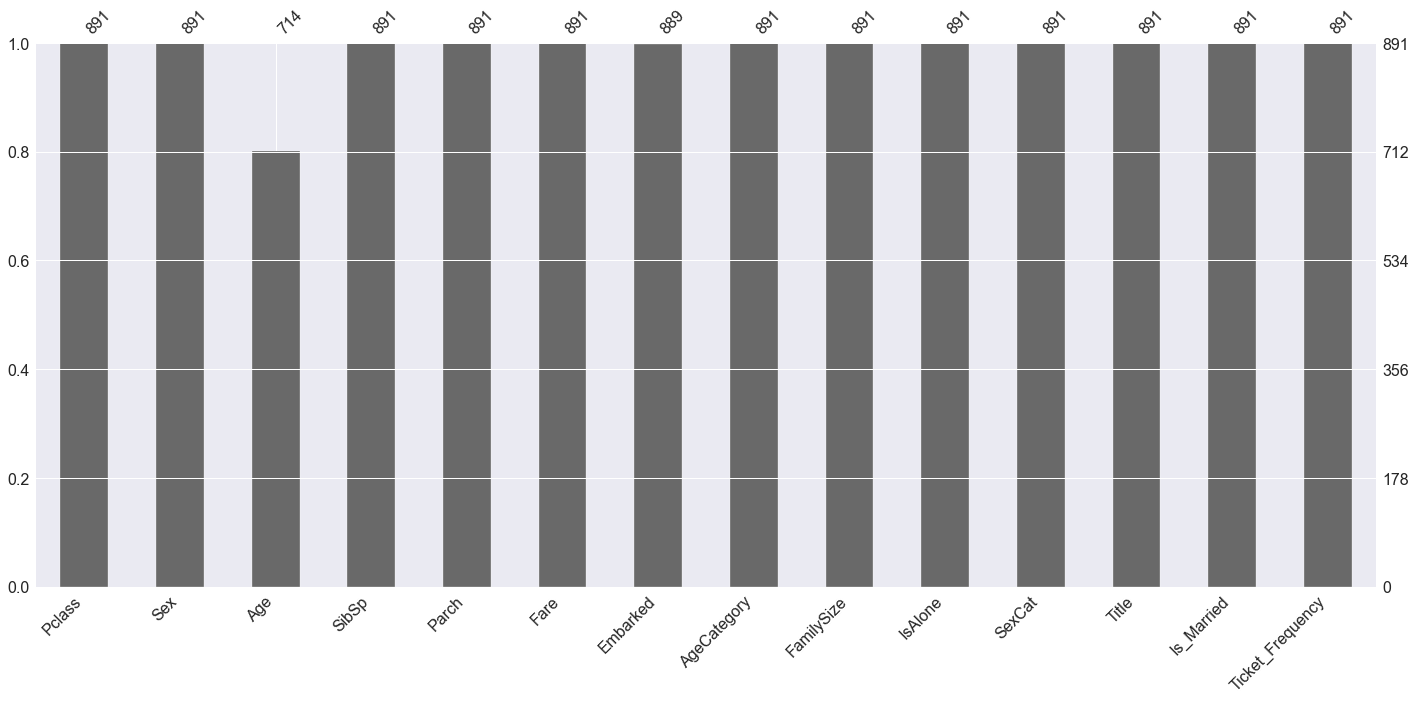

In [32]:
msno.bar(df)

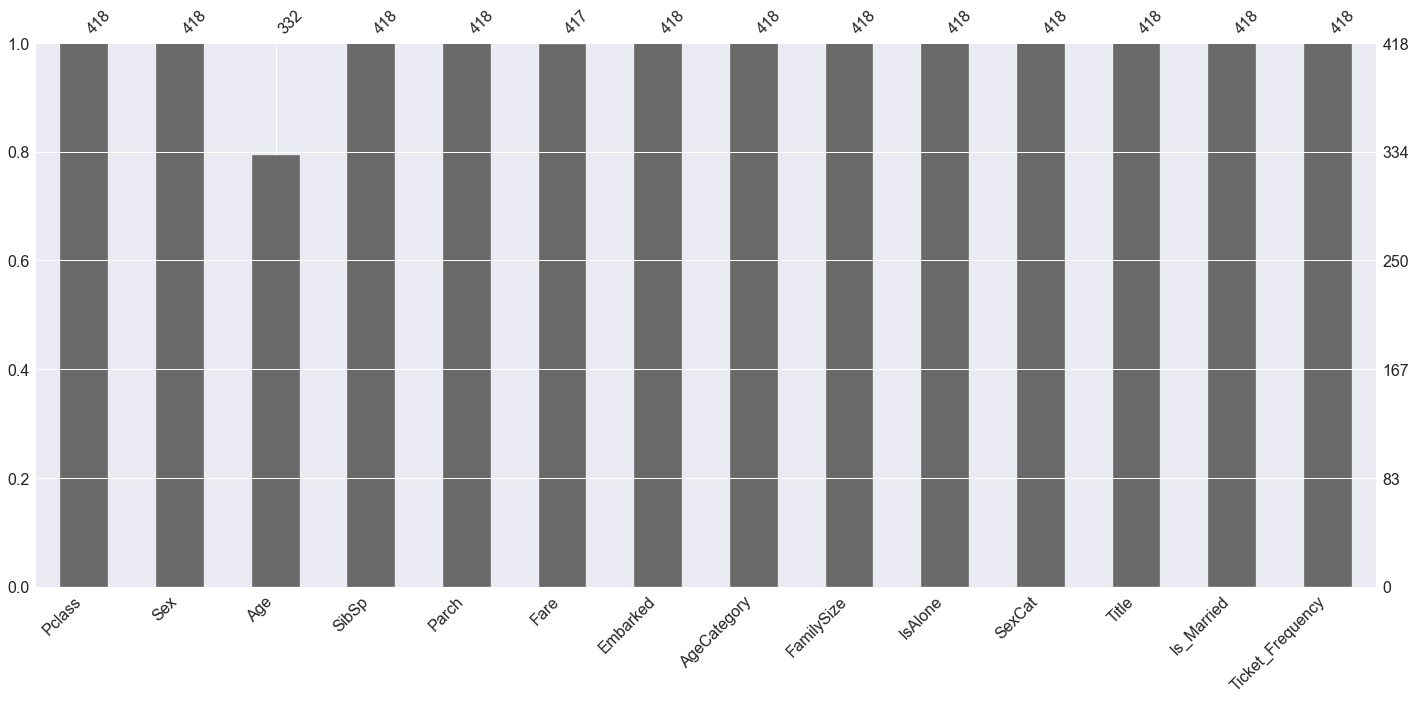

In [33]:
msno.bar(df_test)

- We can see that Age column has missing values & Fare also has missing values but its not showing in the bar plots because of size issue
    - lets see is there any reason for the missing values, any correlation between the columns for missing values

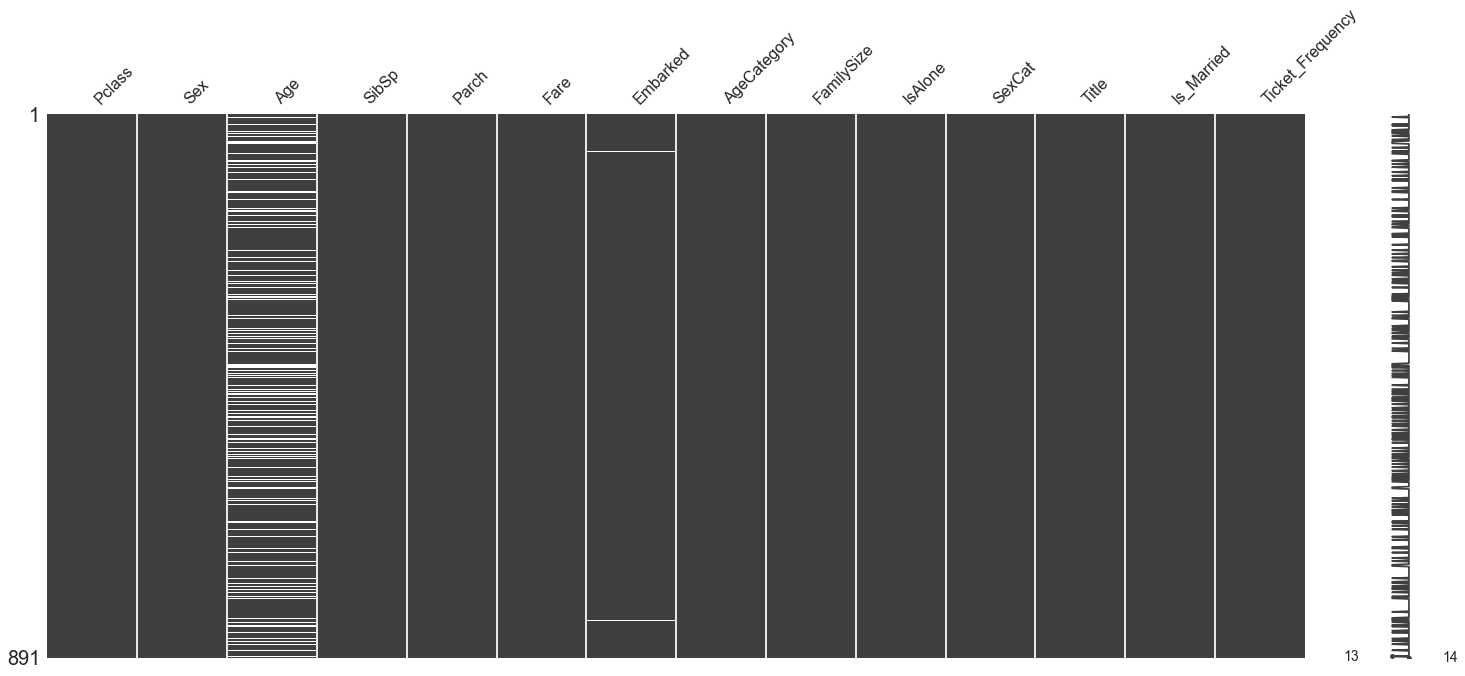

In [40]:
msno.matrix(df) #Training data

- the white line indicates the missing values, the embarked column has 2 missing values so the line is two

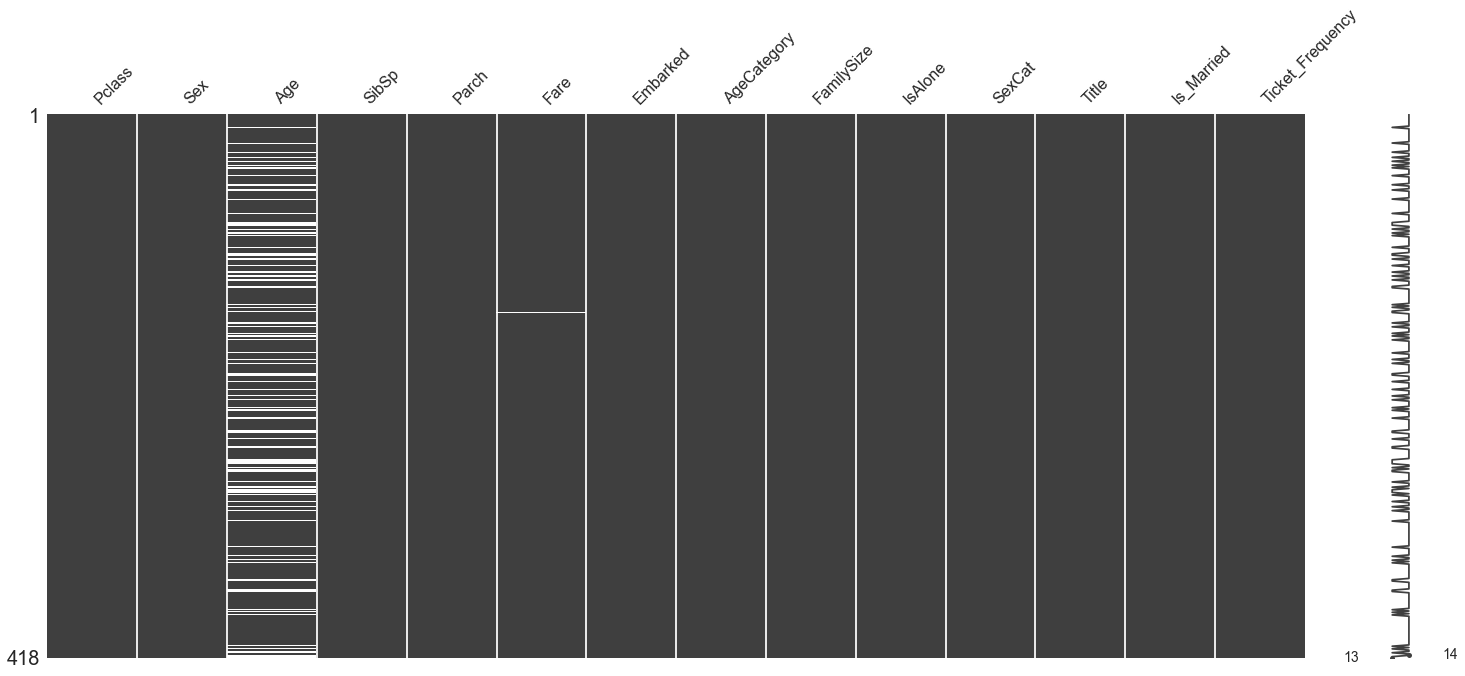

In [41]:
msno.matrix(df_test)

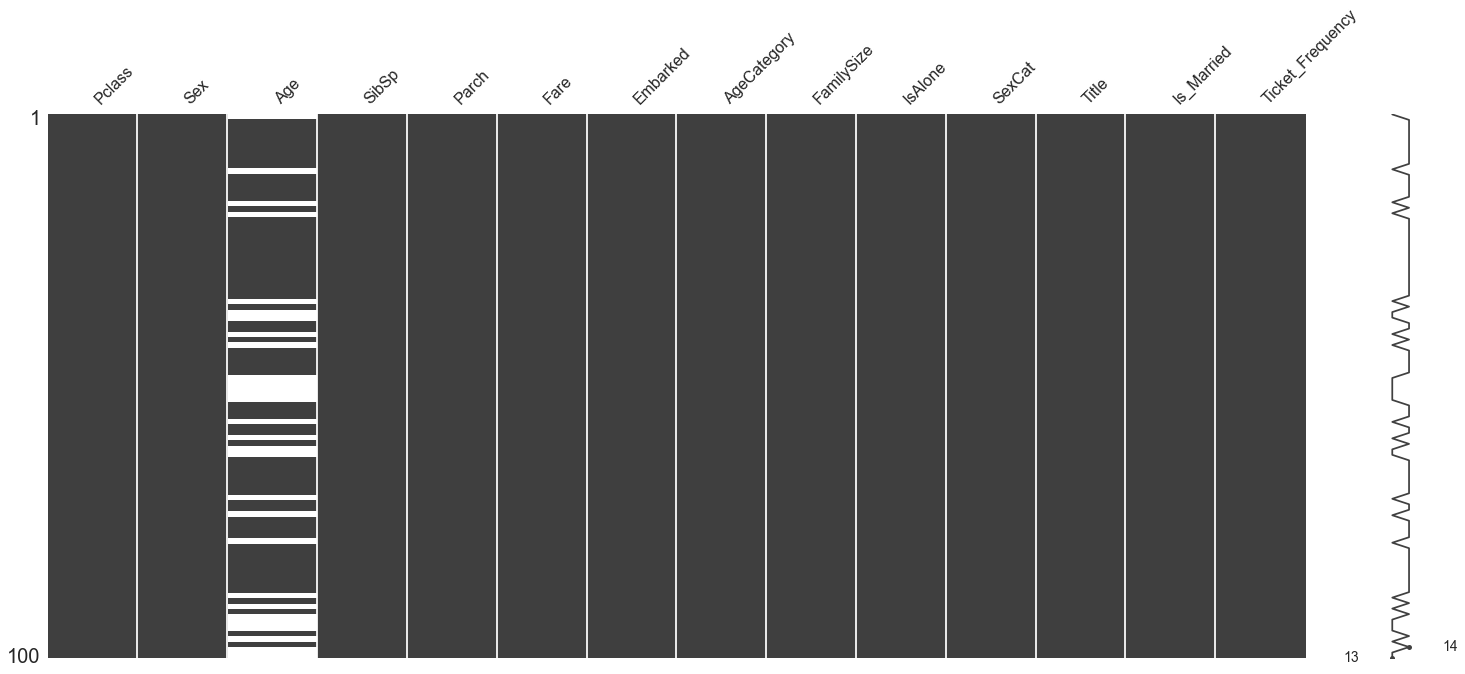

In [42]:
msno.matrix(df.sample(100))
#It is also possible to sample the dataset to pinpoint the exact location of the missing values. For instance let's check the first 100 rows.

lets check is there any correlation for the missing values

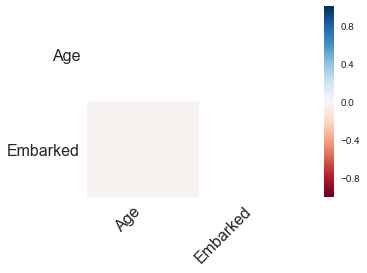

In [44]:
msno.heatmap(df,figsize=(5, 3.5)) #for training data

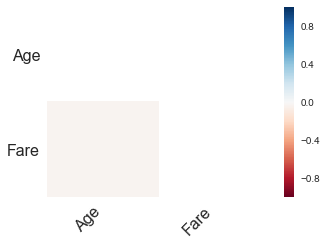

In [45]:
msno.heatmap(df_test,figsize=(5, 3.5)) #for testing data

- As we can see there is correlation

###### Finding reason for missing data using Dendrogram
- A dendogram is a tree diagram of missingness. It groups the highly correlated variables together.

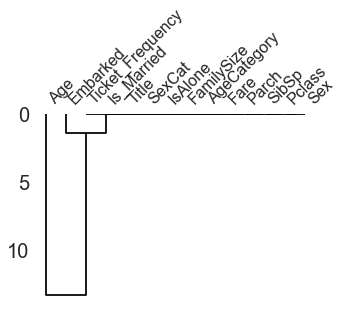

In [50]:
msno.dendrogram(df,figsize=(5, 3.5)) #training

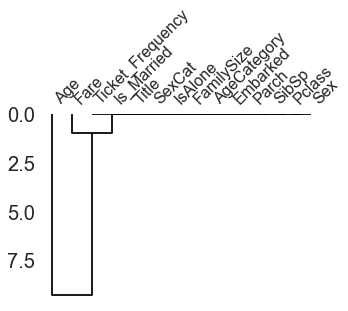

In [52]:
msno.dendrogram(df_test,figsize=(5, 3.5)) #testing

In [153]:
df_train = df #Re saving, to avoid confusion

###### imputations Techniques for missing values
- Imputating with a constant value
- Imputation using the statistics (mean, median or most frequent)
- KNN
- MICE
- I preferred to use KNN for better result, Because of continous data

In [ ]:
# Imputation using the statistics (mean, median or most frequent)
#from sklearn.impute import SimpleImputer
#train_most_frequent = train.copy()
#setting strategy to 'mean' to impute by the mean
#mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
#train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)

In [154]:
#K-Nearest Neighbor Imputation
train_knn = df_train.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['Age'] = knn_imputer.fit_transform(train_knn[['Age']])

In [155]:
train_knn.isna().sum() #All the missing values of the 'Age' column is filled

Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            2
AgeCategory         0
FamilySize          0
IsAlone             0
SexCat              0
Title               0
Is_Married          0
Ticket_Frequency    0
dtype: int64

In [156]:
train_knn = train_knn.ffill(axis = 1) #filling Embarked column

In [157]:
train_knn.isna().sum()

Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
AgeCategory         0
FamilySize          0
IsAlone             0
SexCat              0
Title               0
Is_Married          0
Ticket_Frequency    0
dtype: int64

In [158]:
#K-Nearest Neighbor Imputation
test_knn = df_test.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
test_knn['Age'] = knn_imputer.fit_transform(test_knn[['Age']])
test_knn['Fare'] = knn_imputer.fit_transform(test_knn[['Fare']])

In [159]:
test_knn.isna().sum()

Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
AgeCategory         0
FamilySize          0
IsAlone             0
SexCat              0
Title               0
Is_Married          0
Ticket_Frequency    0
dtype: int64

- As we can see in our dataset our data is pretty much balanced, 61% are survived and 38.8% not survived in our target variabl,
- But we have less data in our training set, So lets tackle the problem 
- three major solution is  RandomUnderSampling, SMOTE and SMOTEENN.
- We also have the option of not balancing data, going straight to the Pipeline part.

# 1.7 Lets deal with the categorical variable

In [160]:
train_knn.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeCategory,FamilySize,IsAlone,SexCat,Title,Is_Married,Ticket_Frequency
0,3,male,22,1,0,7.25,S,mature,small,No,maturemale,Mr,0,1
1,1,female,38,1,0,71.2833,C,mature,small,No,maturefemale,Miss/Mrs/Ms,1,1
2,3,female,26,0,0,7.925,S,mature,small,Yes,maturefemale,Miss/Mrs/Ms,0,1


In [161]:
test_knn.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeCategory,FamilySize,IsAlone,SexCat,Title,Is_Married,Ticket_Frequency
0,3,male,34.5,0,0,7.8292,Q,mature,small,yes,maturemale,Mr,0,1
1,3,female,47.0,1,0,7.0000,S,mature,small,no,maturefemale,Miss/Mrs/Ms,0,1
2,2,male,62.0,0,0,9.6875,Q,senior,small,yes,seniormale,Mr,0,1


In [162]:
# with the helo of category encoders
#encoder = ce.BinaryEncoder(cols=['Sex','Embarked','AgeCategory','FamilySize','IsAlone','SexCat','Title'])
#train_binary = encoder.fit_transform(train_knn)
#test_binary = encoder.fit_transform(test_knn)

In [163]:
DSex=pd.get_dummies(train_knn['Sex'], prefix='Sex')
train_knn = pd.concat([train_knn, DSex], axis=1)

In [164]:
DEmbarked=pd.get_dummies(train_knn['Embarked'], prefix='Embarked')
train_knn = pd.concat([train_knn, DEmbarked], axis=1)

In [165]:
DAgeCategory=pd.get_dummies(train_knn['AgeCategory'], prefix='AgeCategory')
train_knn = pd.concat([train_knn, DAgeCategory], axis=1) 

In [166]:
DFamilySize=pd.get_dummies(train_knn['FamilySize'], prefix='FamilySize')
train_knn = pd.concat([train_knn, DFamilySize], axis=1)  

In [167]:
DIsAlone=pd.get_dummies(train_knn['IsAlone'], prefix='IsAlone')
train_knn = pd.concat([train_knn, DIsAlone], axis=1)

In [168]:
DSexCat=pd.get_dummies(train_knn['SexCat'], prefix='SexCat')
train_knn = pd.concat([train_knn, DSexCat], axis=1) 

In [169]:
DTitle=pd.get_dummies(train_knn['Title'], prefix='Title')
train_knn = pd.concat([train_knn, DTitle], axis=1) 

In [170]:
train_knn.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeCategory,FamilySize,IsAlone,...,IsAlone_No,IsAlone_Yes,SexCat_maturefemale,SexCat_maturemale,SexCat_seniorfemale,SexCat_seniormale,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr
0,3,male,22,1,0,7.25,S,mature,small,No,...,1,0,0,1,0,0,0,0,0,1
1,1,female,38,1,0,71.2833,C,mature,small,No,...,1,0,1,0,0,0,0,0,1,0
2,3,female,26,0,0,7.925,S,mature,small,Yes,...,0,1,1,0,0,0,0,0,1,0


In [171]:
train_knn.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'AgeCategory', 'FamilySize', 'IsAlone', 'SexCat', 'Title', 'Is_Married',
       'Ticket_Frequency', 'Sex_female', 'Sex_male', 'Embarked_80.0',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'AgeCategory_',
       'AgeCategory_mature', 'AgeCategory_senior', 'AgeCategory_young',
       'FamilySize_large', 'FamilySize_medium', 'FamilySize_small',
       'IsAlone_No', 'IsAlone_Yes', 'SexCat_maturefemale', 'SexCat_maturemale',
       'SexCat_seniorfemale', 'SexCat_seniormale',
       'Title_Dr/Military/Noble/Clergy', 'Title_Master', 'Title_Miss/Mrs/Ms',
       'Title_Mr'],
      dtype='object')

In [172]:
train_knn=train_knn.drop(['Sex'],axis=1)
train_knn=train_knn.drop(['Embarked'],axis=1)
train_knn=train_knn.drop(['AgeCategory'],axis=1)
train_knn=train_knn.drop(['FamilySize'],axis=1)
train_knn=train_knn.drop(['IsAlone'],axis=1)
train_knn=train_knn.drop(['SexCat'],axis=1)
train_knn=train_knn.drop(['Title'],axis=1)
train_knn=train_knn.drop(['Embarked_80.0'],axis=1)
train_knn=train_knn.drop(['AgeCategory_'],axis=1)

In [173]:
train_knn

,Pclass,Age,SibSp,Parch,Fare,Is_Married,Ticket_Frequency,Sex_female,Sex_male,Embarked_C,...,IsAlone_No,IsAlone_Yes,SexCat_maturefemale,SexCat_maturemale,SexCat_seniorfemale,SexCat_seniormale,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr
0,3,22,1,0,7.25,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,1,38,1,0,71.2833,1,1,1,0,1,...,1,0,1,0,0,0,0,0,1,0
2,3,26,0,0,7.925,0,1,1,0,0,...,0,1,1,0,0,0,0,0,1,0
3,1,35,1,0,53.1,1,2,1,0,0,...,1,0,1,0,0,0,0,0,1,0
4,3,35,0,0,8.05,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
887,1,19,0,0,30,0,1,1,0,0,...,0,1,1,0,0,0,0,0,1,0
888,3,29.6991,1,2,23.45,0,2,1,0,0,...,1,0,1,0,0,0,0,0,1,0
889,1,26,0,0,30,0,1,0,1,1,...,0,1,0,1,0,0,0,0,0,1


In [174]:
train_knn.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Is_Married',
       'Ticket_Frequency', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'AgeCategory_mature', 'AgeCategory_senior',
       'AgeCategory_young', 'FamilySize_large', 'FamilySize_medium',
       'FamilySize_small', 'IsAlone_No', 'IsAlone_Yes', 'SexCat_maturefemale',
       'SexCat_maturemale', 'SexCat_seniorfemale', 'SexCat_seniormale',
       'Title_Dr/Military/Noble/Clergy', 'Title_Master', 'Title_Miss/Mrs/Ms',
       'Title_Mr'],
      dtype='object')

In [175]:
# On test data
DSex=pd.get_dummies(test_knn['Sex'], prefix='Sex')
test_knn = pd.concat([test_knn, DSex], axis=1)

DEmbarked=pd.get_dummies(test_knn['Embarked'], prefix='Embarked')
test_knn = pd.concat([test_knn, DEmbarked], axis=1)

DAgeCategory=pd.get_dummies(test_knn['AgeCategory'], prefix='AgeCategory')
test_knn = pd.concat([test_knn, DAgeCategory], axis=1) 

DFamilySize=pd.get_dummies(test_knn['FamilySize'], prefix='FamilySize')
test_knn = pd.concat([test_knn, DFamilySize], axis=1)

DIsAlone=pd.get_dummies(test_knn['IsAlone'], prefix='IsAlone')
test_knn = pd.concat([test_knn, DIsAlone], axis=1)

DSexCat=pd.get_dummies(test_knn['SexCat'], prefix='SexCat')
test_knn = pd.concat([test_knn, DSexCat], axis=1) 

DTitle=pd.get_dummies(test_knn['Title'], prefix='Title')
test_knn = pd.concat([test_knn, DTitle], axis=1) 

In [176]:
test_knn.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeCategory,FamilySize,IsAlone,...,IsAlone_no,IsAlone_yes,SexCat_maturefemale,SexCat_maturemale,SexCat_seniorfemale,SexCat_seniormale,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr
0,3,male,34.5,0,0,7.8292,Q,mature,small,yes,...,0,1,0,1,0,0,0,0,0,1
1,3,female,47.0,1,0,7.0000,S,mature,small,no,...,1,0,1,0,0,0,0,0,1,0
2,2,male,62.0,0,0,9.6875,Q,senior,small,yes,...,0,1,0,0,0,1,0,0,0,1


In [177]:
test_knn.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'AgeCategory', 'FamilySize', 'IsAlone', 'SexCat', 'Title', 'Is_Married',
       'Ticket_Frequency', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'AgeCategory_', 'AgeCategory_mature',
       'AgeCategory_senior', 'AgeCategory_young', 'FamilySize_large',
       'FamilySize_medium', 'FamilySize_small', 'IsAlone_no', 'IsAlone_yes',
       'SexCat_maturefemale', 'SexCat_maturemale', 'SexCat_seniorfemale',
       'SexCat_seniormale', 'Title_Dr/Military/Noble/Clergy', 'Title_Master',
       'Title_Miss/Mrs/Ms', 'Title_Mr'],
      dtype='object')

In [178]:
test_knn=test_knn.drop(['Sex'],axis=1)
test_knn=test_knn.drop(['Embarked'],axis=1)
test_knn=test_knn.drop(['AgeCategory'],axis=1)
test_knn=test_knn.drop(['FamilySize'],axis=1)
test_knn=test_knn.drop(['IsAlone'],axis=1)
test_knn=test_knn.drop(['SexCat'],axis=1)
test_knn=test_knn.drop(['Title'],axis=1)
test_knn=test_knn.drop(['AgeCategory_'],axis=1)

In [179]:
test_knn.head(3)

,Pclass,Age,SibSp,Parch,Fare,Is_Married,Ticket_Frequency,Sex_female,Sex_male,Embarked_C,...,IsAlone_no,IsAlone_yes,SexCat_maturefemale,SexCat_maturemale,SexCat_seniorfemale,SexCat_seniormale,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr
0,3,34.5,0,0,7.8292,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,3,47.0,1,0,7.0000,0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
2,2,62.0,0,0,9.6875,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [180]:
train_knn.head(3)

,Pclass,Age,SibSp,Parch,Fare,Is_Married,Ticket_Frequency,Sex_female,Sex_male,Embarked_C,...,IsAlone_No,IsAlone_Yes,SexCat_maturefemale,SexCat_maturemale,SexCat_seniorfemale,SexCat_seniormale,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr
0,3,22,1,0,7.25,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,1,38,1,0,71.2833,1,1,1,0,1,...,1,0,1,0,0,0,0,0,1,0
2,3,26,0,0,7.925,0,1,1,0,0,...,0,1,1,0,0,0,0,0,1,0


# 1.8 Lets deal with the Class Imbalance

In [181]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=42, sampling_strategy=1.0)
X_train_res, y_train_res = os.fit_sample(train_knn,target)

In [182]:
print("modified data shape :",X_train_res.shape,y_train_res.shape)

modified data shape : (1098, 28) (1098,)


In [183]:
print("Original data shape:",train_knn.shape,target.shape)

Original data shape: (891, 28) (891,)


In [184]:
df_survivors = target[target == 1]
df_nonsurvivors = target[target == 0]

In [185]:
print("Original data Target variable")
print("survival :",df_survivors.shape,"Non survival:",df_nonsurvivors.shape)

Original data Target variable
survival : (342,) Non survival: (549,)


In [186]:
df_survivors_new = y_train_res[y_train_res == 1]
df_nonsurvivors_new = y_train_res[y_train_res == 0]

In [187]:
print("Modified data Target variable")
print("survival :",df_survivors_new.shape,"Non survival:",df_nonsurvivors_new.shape)

Modified data Target variable
survival : (549,) Non survival: (549,)


In [188]:
X_train_res.head(5)

,Pclass,Age,SibSp,Parch,Fare,Is_Married,Ticket_Frequency,Sex_female,Sex_male,Embarked_C,...,IsAlone_No,IsAlone_Yes,SexCat_maturefemale,SexCat_maturemale,SexCat_seniorfemale,SexCat_seniormale,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr
0,3,22,1,0,7.25,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,1,38,1,0,71.2833,1,1,1,0,1,...,1,0,1,0,0,0,0,0,1,0
2,3,26,0,0,7.925,0,1,1,0,0,...,0,1,1,0,0,0,0,0,1,0
3,1,35,1,0,53.1,1,2,1,0,0,...,1,0,1,0,0,0,0,0,1,0
4,3,35,0,0,8.05,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1


In [127]:
y_train_res

0       0
1       1
2       1
3       1
4       0
       ..
1093    1
1094    1
1095    1
1096    1
1097    1
Name: Survived, Length: 1098, dtype: int64

# Section 2 - Supervised Learning: Classification

In [189]:
#Lets split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train_res, 
                                                    y_train_res, test_size=0.30, 
                                                    random_state=101)

### 2.1 Building Logistic Regression

#### 2.1.1 Logistic Regression

In [53]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [54]:
predictions = logmodel.predict(X_test)

In [55]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[129,  25],
       [ 43, 133]], dtype=int64)

In [56]:
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.793939393939394

##### 2.1.2 Evaluation of logistic regression

In [84]:
#from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       154
           1       0.84      0.76      0.80       176

    accuracy                           0.79       330
   macro avg       0.80      0.80      0.79       330
weighted avg       0.80      0.79      0.79       330



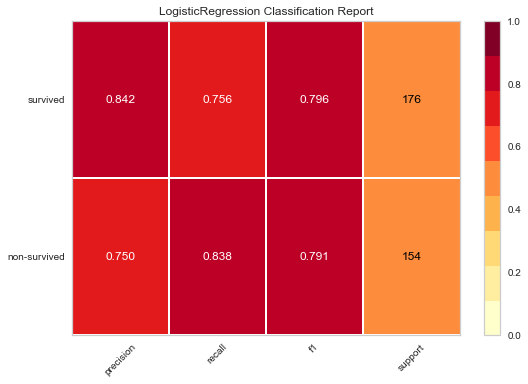

In [92]:
#from yellowbrick.classifier import ClassificationReport
classes = ["non-survived", "survived"]
visualizer = ClassificationReport(logmodel, classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

- Precision
    -Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

- Recall
    -Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

- f1 score
    -The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

- support
    -Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

### 2.2 Building Gaussian Naive Bayes

In [57]:
#from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [58]:
gnb_predictions = gnb.predict(X_test)

In [59]:
gnb_accuracy=confusion_matrix(y_test,gnb_predictions)
gnb_accuracy

array([[129,  25],
       [ 50, 126]], dtype=int64)

In [60]:
gnb_accuracy_score=accuracy_score(y_test,gnb_predictions)
gnb_accuracy_score

0.7727272727272727

In [61]:
print(classification_report(y_test,gnb_predictions))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77       154
           1       0.83      0.72      0.77       176

    accuracy                           0.77       330
   macro avg       0.78      0.78      0.77       330
weighted avg       0.78      0.77      0.77       330



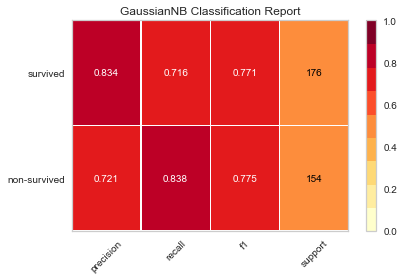

In [66]:
#from yellowbrick.classifier import ClassificationReport
classes = ["non-survived", "survived"]
visualizer = ClassificationReport(gnb, classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

### 2.3 Support Vector Machine:

<b>2.3.1 using 'Linear Kernal'</b>

In [61]:
#from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train,y_train)

LinearSVC()

In [62]:
linear_svc_predictions = linear_svc.predict(X_test)

In [63]:
linear_svc_accuracy = accuracy_score(y_test, linear_svc_predictions)
linear_svc_accuracy

0.7606060606060606

In [73]:
print(classification_report(y_test,linear_svc_predictions))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       154
           1       0.88      0.65      0.75       176

    accuracy                           0.77       330
   macro avg       0.79      0.77      0.77       330
weighted avg       0.79      0.77      0.76       330



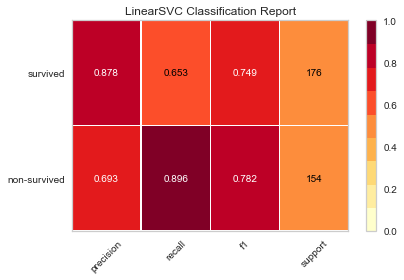

In [74]:
#from yellowbrick.classifier import ClassificationReport
classes = ["non-survived", "survived"]
visualizer = ClassificationReport(linear_svc , classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

<b>2.3.2 using 'rbf kernal' (Gaussian Kernel) for classification</b>

In [64]:
#from sklearn.svm import svc
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train,y_train)

SVC()

In [65]:
rbf_svc_predictions = rbf_svc.predict(X_test)

In [66]:
rbf_svc_accuracy = accuracy_score(y_test,rbf_svc_predictions)
rbf_svc_accuracy

0.6272727272727273

In [81]:
print(classification_report(y_test,rbf_svc_predictions))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67       154
           1       0.73      0.48      0.58       176

    accuracy                           0.63       330
   macro avg       0.65      0.64      0.62       330
weighted avg       0.66      0.63      0.62       330



<b>2.3.3 using 'Sigmoid Kernel' for classification</b>

In [67]:
#from sklearn.svm import svc
sigmoid_svc = SVC(kernel='sigmoid')
sigmoid_svc.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [68]:
sigmoid_svc_predictions = sigmoid_svc.predict(X_test)

In [69]:
sigmoid_svc_accuracy = accuracy_score(y_test,sigmoid_svc_predictions)
sigmoid_svc_accuracy 

0.5636363636363636

In [85]:
print(classification_report(y_test,sigmoid_svc_predictions))

              precision    recall  f1-score   support

           0       0.53      0.64      0.58       154
           1       0.61      0.50      0.55       176

    accuracy                           0.56       330
   macro avg       0.57      0.57      0.56       330
weighted avg       0.57      0.56      0.56       330



SVM perform well when there is a higher dimensionality in the data, i tried using 3 kernal out of 4, <br>4th one is 'poly' which cant be used for binary.

### 2.4 Stochastic Gradient Descent (SGD):

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. <br>
Strictly speaking, SGD is merely an optimization technique and does not correspond to a specific family of machine learning models. It is only a way to train a model. <br>
<br><b> for Classification </b>
- loss="hinge": (soft-margin) linear Support Vector Machine,
- loss="modified_huber": smoothed hinge loss,
- loss="log": logistic regression, <br>
<br>
<b>for Regression </b>
- loss="squared_loss": Ordinary least squares,
- loss="huber": Huber loss for robust regression,
- loss="epsilon_insensitive": linear Support Vector Regression.

In [70]:
#from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(max_iter=5, tol=None)
sgd_classifier.fit(X_train,y_train)

SGDClassifier(max_iter=5, tol=None)

In [71]:
sgd_classfier_predictions = sgd_classifier.predict(X_test)

In [72]:
sgd_classifier_accuracy = accuracy_score(y_test, sgd_classfier_predictions)
sgd_classifier_accuracy 

0.6363636363636364

In [96]:
print(classification_report(y_test,sgd_classfier_predictions))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       154
           1       0.82      0.73      0.77       176

    accuracy                           0.77       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.78      0.77      0.77       330



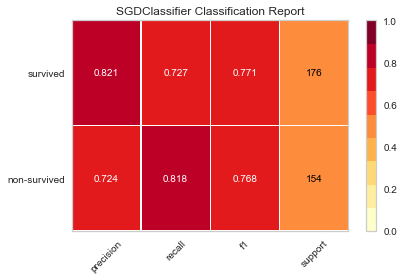

In [97]:
#from yellowbrick.classifier import ClassificationReport
classes = ["non-survived", "survived"]
visualizer = ClassificationReport(sgd_classifier , classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

### 2.5 Perceptron

Perceptron is a classification algorithm which shares the same underlying implementation with SGDClassifier. In fact, Perceptron() is equivalent to SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None).

In [73]:
#from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Perceptron(max_iter=5)

In [74]:
perceptron_predictions = perceptron.predict(X_test)

In [75]:
perceptron_accuracy = accuracy_score(y_test,perceptron_predictions)
perceptron_accuracy

0.6181818181818182

In [247]:
print(classification_report(y_test,perceptron_predictions))

              precision    recall  f1-score   support

           0       0.56      0.87      0.68       154
           1       0.78      0.40      0.53       176

    accuracy                           0.62       330
   macro avg       0.67      0.63      0.60       330
weighted avg       0.68      0.62      0.60       330



### 2.6 K-Nearest Neighbor:

In [76]:
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [77]:
knn_predictions = knn.predict(X_test)

In [78]:
knn_accuracy = accuracy_score(y_test,knn_predictions)
knn_accuracy

0.7515151515151515

In [106]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       154
           1       0.76      0.77      0.77       176

    accuracy                           0.75       330
   macro avg       0.75      0.75      0.75       330
weighted avg       0.75      0.75      0.75       330



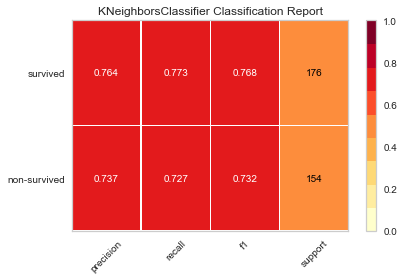

In [107]:
#from yellowbrick.classifier import ClassificationReport
classes = ["non-survived", "survived"]
visualizer = ClassificationReport(knn , classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

<b>2.6.1 Comparing Error Rate with the K Value </b>

In [79]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

The above script executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

Text(0, 0.5, 'Mean Error')

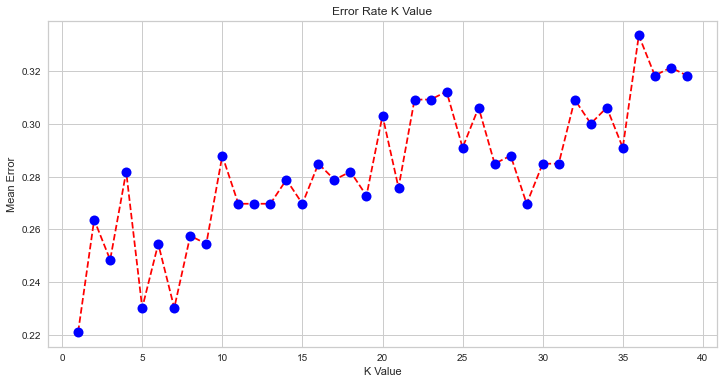

In [109]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [80]:
knn = KNeighborsClassifier(n_neighbors = 1) # or k=5 is better as per above graph.
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [81]:
knn_predictions = knn.predict(X_test)

In [82]:
knn_accuracy = accuracy_score(y_test,knn_predictions)
knn_accuracy

0.7787878787878788

In [142]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       154
           1       0.78      0.81      0.80       176

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330



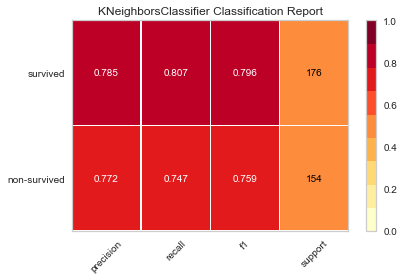

In [143]:
#from yellowbrick.classifier import ClassificationReport
classes = ["non-survived", "survived"]
visualizer = ClassificationReport(knn , classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

## 2.7 Decision Tree:

In [83]:
#from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [84]:
decision_tree_prediction = decision_tree.predict(X_test)

In [85]:
decision_tree_accuracy = accuracy_score(y_test, decision_tree_prediction)
decision_tree_accuracy

0.8303030303030303

<b> Let me try by mentioning hyperparameter 'max_depth' of the trees </b>

In [173]:
error = []

# Calculating error for max_depth tree values between 1 and 30
for i in range(1, 30):
    decision_tree = DecisionTreeClassifier(max_depth=i)
    decision_tree.fit(X_train,y_train)
    tree_pred_i = decision_tree.predict(X_test)
    error.append(np.mean(tree_pred_i != y_test))

Text(0, 0.5, 'Mean Error')

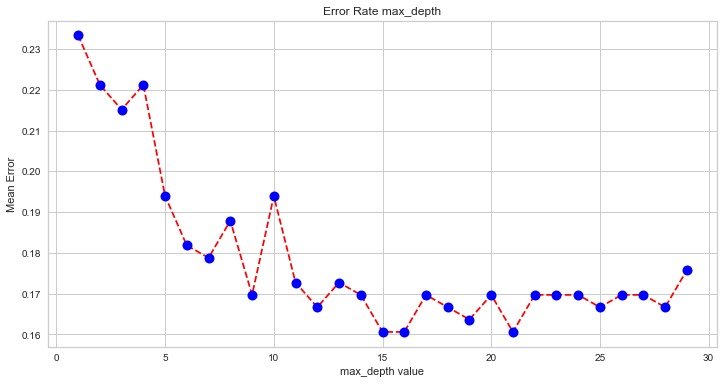

In [174]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate max_depth')
plt.xlabel('max_depth value')
plt.ylabel('Mean Error')

In [86]:
decision_tree = DecisionTreeClassifier(max_depth=21)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=21)

In [87]:
decision_tree_prediction = decision_tree.predict(X_test)

In [88]:
decision_tree_accuracy = accuracy_score(y_test, decision_tree_prediction)
decision_tree_accuracy

0.8363636363636363

In [197]:
print(classification_report(y_test,decision_tree_prediction))

              precision    recall  f1-score   support

           0       0.86      0.77      0.82       154
           1       0.82      0.89      0.85       176

    accuracy                           0.84       330
   macro avg       0.84      0.83      0.83       330
weighted avg       0.84      0.84      0.84       330



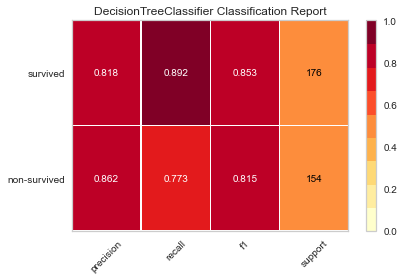

In [198]:
#from yellowbrick.classifier import ClassificationReport
classes = ["non-survived", "survived"]
visualizer = ClassificationReport(decision_tree , classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [212]:
feature_names = X_train.columns

In [214]:
dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True, 
                                rounded = True, feature_names = feature_names, 
                                proportion = True, class_names = ['Not defaulted', 'Defaulted'])

In [226]:
#dot_data #its a long string require graviz to display properly
# Warning : sometimes graphviz will not work, You have to go to search bar type graphviz and copy its full path, 
#then in system variables you have to edit environment variables path and paste the copied path of graphviz
graph = graphviz.Source(dot_data) 
#graph #Do not print unless you want to save

#import pydot

#graph.draw('titanic_tree.png')

### 2.8 Random Forest:

In [99]:
#from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [100]:
random_forest_predictions = random_forest.predict(X_test)

In [101]:
random_forest_accuracy = accuracy_score(y_test,random_forest_predictions)
random_forest_accuracy

0.8515151515151516

In [236]:
print(classification_report(y_test,random_forest_predictions))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       154
           1       0.84      0.89      0.86       176

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



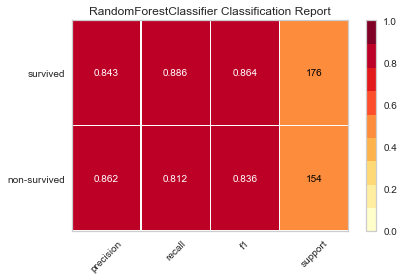

In [237]:
#from yellowbrick.classifier import ClassificationReport
classes = ["non-survived", "survived"]
visualizer = ClassificationReport(random_forest, classes=classes, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [102]:
#Lets note all of our accuracy in a single dataframe
results = pd.DataFrame({
    'Model': ['logmodel', 'gnb', 'linear_svc', 
              'rbf_svc', 'sigmoid_svc', 'sgd_classifier', 
              'perceptron','knn',
              'decision_tree','random_forest'],
    'Score': [accuracy, gnb_accuracy_score, linear_svc_accuracy, 
              rbf_svc_accuracy, sigmoid_svc_accuracy, sgd_classifier_accuracy, 
              perceptron_accuracy, knn_accuracy,decision_tree_accuracy,random_forest_accuracy]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.851515,random_forest
0.836364,decision_tree
0.793939,logmodel
0.778788,knn
0.772727,gnb
0.760606,linear_svc
0.636364,sgd_classifier
0.627273,rbf_svc
0.618182,perceptron


## 2.9 K-Fold Cross Validation:

K-Fold Cross Validation randomly splits the training data into K subsets called folds.

In [105]:
from sklearn.model_selection import cross_val_score
cross_rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(cross_rf,X_train,y_train,cv=100,scoring="accuracy")

In [106]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [1.         0.875      1.         0.75       1.         1.
 0.75       0.75       1.         0.875      0.875      1.
 0.75       0.875      1.         0.5        0.875      0.875
 0.875      0.875      1.         0.875      0.875      1.
 1.         0.75       1.         1.         0.875      0.875
 1.         0.875      0.75       0.75       0.75       0.875
 1.         1.         0.875      0.875      0.875      0.875
 1.         0.875      0.875      0.625      0.625      0.75
 0.875      1.         0.625      0.875      0.875      0.875
 0.875      0.75       0.875      0.75       0.75       0.75
 0.625      1.         1.         0.875      0.625      0.75
 0.875      0.875      0.85714286 1.         0.71428571 1.
 0.85714286 1.         0.85714286 1.         0.85714286 0.85714286
 0.71428571 0.85714286 0.85714286 1.         0.85714286 1.
 0.71428571 0.85714286 1.         0.57142857 0.85714286 0.85714286
 0.71428571 0.71428571 0.71428571 0.57142857 0.57142857 1.
 1.        

Model shows 85% of accuracy with 12% of deviation

12% of deviation is really not good.

## 3.0 Lets see, the Feature importacnce

In [107]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fare,0.203
Age,0.177
Title_Mr,0.082
Sex_male,0.072
Ticket_Frequency,0.061
Pclass,0.061
Sex_female,0.056
Title_Miss/Mrs/Ms,0.043
SibSp,0.026


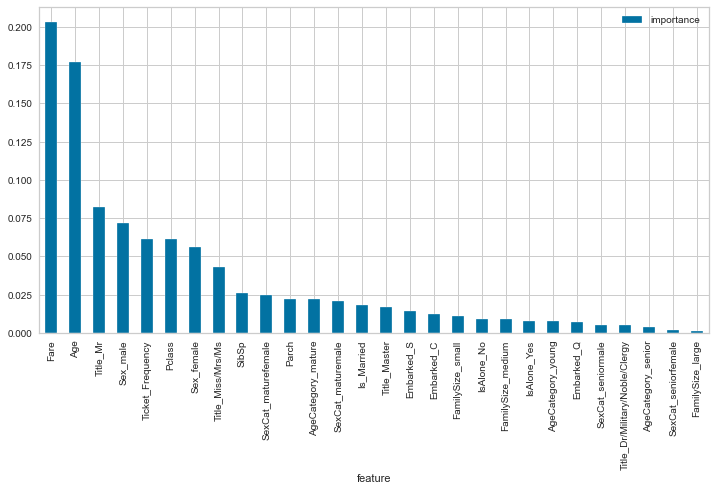

In [121]:
importances.plot.bar()
#plt.rcParams["figure.figsize"] = (12,6)

In [128]:
#Lets drop the feature which has less importance
train_df  = X_train_res.drop("SexCat_seniorfemale", axis=1)
train_df  = X_train_res.drop("FamilySize_large", axis=1)

In [129]:
#Lets split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(train_df, 
                                                    y_train_res, test_size=0.30, 
                                                    random_state=101)

## 3.1 Training random forest again:

In [163]:
random_forest_again = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest_again.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [164]:
random_forest_again_predictions = random_forest_again.predict(X_test)

In [165]:
random_forest_again_predictions_accuracy = accuracy_score(y_test,random_forest_again_predictions)
random_forest_again_predictions_accuracy

0.8545454545454545

Accuracy increased a bit compared to the last time when i trained the random forest

## 3.2 Hyperparameter Tuning

In [43]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

In [45]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
                         'n_estimators': [100, 400, 700, 1000, 1500]})

In [49]:
print("\n The best estimator across ALL searched params:\n",clf.best_estimator_)
print("\n The best score across ALL searched params:\n",clf.best_score_)
print("\n The best parameters across ALL searched params:\n",clf.best_params_)


 The best estimator across ALL searched params:
 RandomForestClassifier(criterion='entropy', min_samples_split=4,
                       n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=1)

 The best score across ALL searched params:
 0.8541295306001189

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 400}


## 3.2.1 Lets Test the new Parameters of parameter tuning

In [130]:
# Random Forest
rf_hyp_tune = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 4,   
                                       n_estimators=400, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

rf_hyp_tune.fit(X_train, y_train)
Y_prediction = rf_hyp_tune.predict(X_test)

rf_hyp_tune.score(X_train, y_train)

print("oob score:", round(rf_hyp_tune.oob_score_, 4)*100, "%")

oob score: 86.07000000000001 %


## 3.2.2 Model Evaluation
Confusion Matrix:

In [52]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(rf_hyp_tune, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[327,  68],
       [ 52, 321]], dtype=int64)

Precision and Recall:

In [53]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.8251928020565553
Recall: 0.8605898123324397


F-Score

In [54]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.8425196850393701

Precision Recall Curve

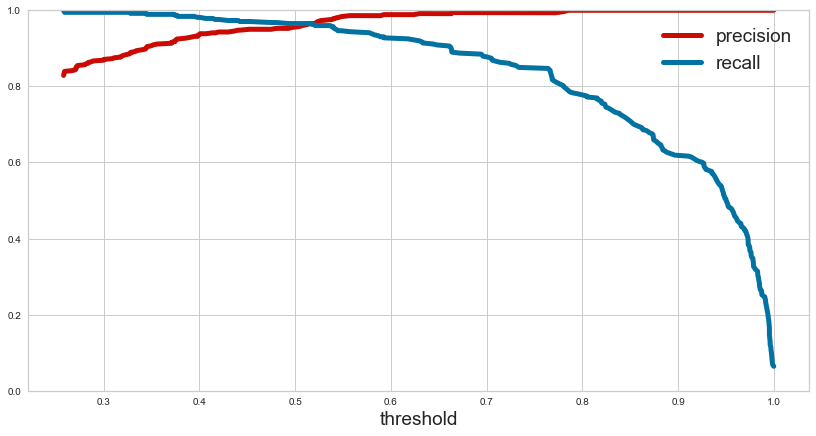

In [55]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = rf_hyp_tune.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

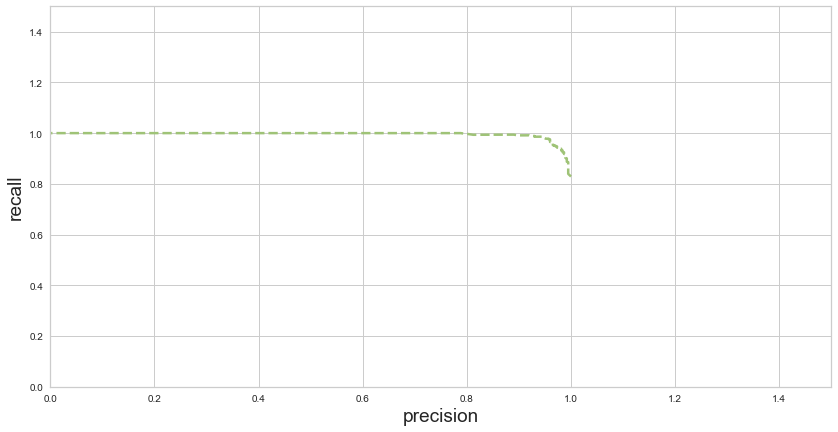

In [56]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

ROC AUC Curve

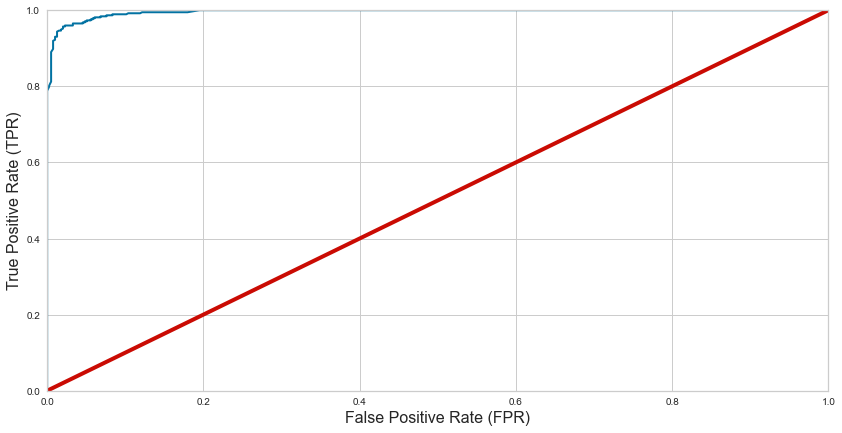

In [57]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

ROC AUC Score

In [58]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9955068381579393


A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

# Thank you !

In [59]:
import plotly.io as pio
pio.renderers.default='notebook'

### Submission to kaggle!

Create csv to upload to Kaggle

In [82]:
#Lets split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(train_df, 
                                                    y_train_res, test_size=0.40, 
                                                    random_state=101)

In [190]:
# Random Forest
rf_hyp_tune = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 4,   
                                       n_estimators=400, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

rf_hyp_tune.fit(X_train, y_train)
Y_prediction = rf_hyp_tune.predict(X_test)

rf_hyp_tune.score(X_train, y_train)

print("oob score:", round(rf_hyp_tune.oob_score_, 4)*100, "%")

oob score: 86.2 %


In [194]:
test_knn.head(3)

,Pclass,Age,SibSp,Parch,Fare,Is_Married,Ticket_Frequency,Sex_female,Sex_male,Embarked_C,...,IsAlone_no,IsAlone_yes,SexCat_maturefemale,SexCat_maturemale,SexCat_seniorfemale,SexCat_seniormale,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr
0,3,34.5,0,0,7.8292,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,3,47.0,1,0,7.0000,0,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
2,2,62.0,0,0,9.6875,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [195]:
test_knn.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Is_Married',
       'Ticket_Frequency', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'AgeCategory_mature', 'AgeCategory_senior',
       'AgeCategory_young', 'FamilySize_large', 'FamilySize_medium',
       'FamilySize_small', 'IsAlone_no', 'IsAlone_yes', 'SexCat_maturefemale',
       'SexCat_maturemale', 'SexCat_seniorfemale', 'SexCat_seniormale',
       'Title_Dr/Military/Noble/Clergy', 'Title_Master', 'Title_Miss/Mrs/Ms',
       'Title_Mr'],
      dtype='object')

In [197]:
prediction_on_test_data = rf_hyp_tune.predict(test_knn)
prediction_on_test_data

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [198]:
prediction_on_test_data.shape

(418,)

In [203]:
df_testt = pd.read_csv("test.csv")

In [204]:
df_testt.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [205]:
submission = pd.DataFrame({'PassengerId':df_testt.PassengerId,'Survived':prediction_on_test_data})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [206]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Titanic Predictionsss 1.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Titanic Predictionsss 1.csv
